# Import all necessary libraries

In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import psycopg2 # needed to get database exception errors when uploading dataframe
import requests # package for getting data from the web
from zipfile import * # package for unzipping zip files
import sqlalchemy
import os

# Importing Schema

In [2]:
table_name_sql = f'''SELECT COUNT(*) 
                    FROM capstone_hydrogenious.crop_all_data
                    '''

In [3]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
from dotenv import load_dotenv
import psycopg2  # Add this import statement
from sqlalchemy import create_engine

load_dotenv()
db_uri = f"postgresql+psycopg2://{os.getenv('user')}:{os.getenv('password')}@{os.getenv('host')}:{os.getenv('port')}/{os.getenv('database')}"
engine = create_engine(db_uri)


def execute_sql_schema(schema='capstone_hydrogenious', table='crops_all_data'):
    # Retrieve column names from the specified table in the schema
    table_name_sql = f'''
        SELECT COLUMN_NAME 
        FROM INFORMATION_SCHEMA.COLUMNS 
        WHERE TABLE_NAME = '{table}'
        AND TABLE_SCHEMA = '{schema}'
        ORDER BY ORDINAL_POSITION
    '''
    
    c_names = engine.execute(table_name_sql).fetchall()

    # Create the SQL schema with the retrieved column names
    sql_schema = f'''
        CREATE TABLE {schema}.{table} (
            {', '.join([f"{col[0]} datatype" for col in c_names])}
        );

        INSERT INTO {schema}.{table} ({', '.join([col[0] for col in c_names])})
        VALUES (value1, value2, ...);
    '''

    # Execute the SQL schema
    with engine.connect() as connection:
        connection.execute(sql_schema)

In [5]:
def get_column_names(schema='capstone_hydrogenious', table='crops_all_data'):
    # Retrieve column names from the specified table in the schema
    table_name_sql = f'''
        SELECT COLUMN_NAME 
        FROM INFORMATION_SCHEMA.COLUMNS 
        WHERE TABLE_NAME = '{table}'
        AND TABLE_SCHEMA = '{schema}'
        ORDER BY ORDINAL_POSITION
    '''
    
    # Execute the SQL query and fetch all column names
    with engine.connect() as connection:
        result = connection.execute(table_name_sql)
        column_names = [row[0] for row in result.fetchall()]
    
    return column_names

# Example usage
schema_name = 'capstone_hydrogenious'
table_name = 'crops_all_data'
columns = get_column_names(schema=schema_name, table=table_name)

print(f"Columns in {schema_name}.{table_name}: {columns}")

Columns in capstone_hydrogenious.crops_all_data: ['Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element', 'Year Code', 'Year', 'Unit', 'Value', 'Flag']


In [6]:
# Read MASTER.txt file and assign to variable master
crops_all = pd.read_csv('/Users/ziada/neuefische/capstone-project-AEJS/dataset/Crops_AllData_Normalized.csv', encoding='latin1')

# Print first 5 rows
crops_all.sample(5)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
687310,87,Guadeloupe,497,Lemons and limes,5312,Area harvested,1995,1995,ha,164.0,Im
148684,53,Benin,176,"Beans, dry",5419,Yield,1977,1977,hg/ha,4736.0,Fc
2390852,5707,European Union (27),1720,"Roots and Tubers, Total",5419,Yield,1991,1991,hg/ha,201941.0,Fc
1385837,184,Rwanda,656,"Coffee, green",5312,Area harvested,1994,1994,ha,2500.0,F
606442,68,France,417,"Peas, green",5510,Production,1997,1997,tonnes,206163.0,NaN


In [44]:
# the dataset should be uploaded to the schema 'capstone_hydrogenious'


# Import get_engine function from sql_functions.py and set it to a variable called engine

from sql_functions import get_engine
engine=get_engine()

# Import psycopg2
import psycopg2

if engine!=None:
    try:
        crops_all.to_sql(name='crops_all_data_sa', # Name of SQL table
                        con=engine, # Engine or connection
                        if_exists='replace', # Drop the table before inserting new values 
                        schema='capstone_hydrogenious', # your class schema
                        index=False, # Write DataFrame index as a column
                        chunksize=5000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None
    else:
        print('no engine')

The table was imported successfully.
no engine


# descriptives crop data

In [7]:
crops_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513868 entries, 0 to 2513867
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Area Code     int64  
 1   Area          object 
 2   Item Code     int64  
 3   Item          object 
 4   Element Code  int64  
 5   Element       object 
 6   Year Code     int64  
 7   Year          int64  
 8   Unit          object 
 9   Value         float64
 10  Flag          object 
dtypes: float64(1), int64(5), object(5)
memory usage: 211.0+ MB


In [8]:
crops_all.isnull().sum()

Area Code            0
Area                 0
Item Code            0
Item                 0
Element Code         0
Element              0
Year Code            0
Year                 0
Unit                 0
Value           154312
Flag            530383
dtype: int64

In [11]:
selected_countries = ['China', 'Ethiopia', 'Malaysia']
unique_counts_selected_countries = crops_all[crops_all['Area'].isin(selected_countries)].nunique()

print(f"Number of unique values in each column for {selected_countries}:\n{unique_counts_selected_countries}")

Number of unique values in each column for ['China', 'Ethiopia', 'Malaysia']:
Area Code           3
Area                3
Item Code         147
Item              147
Element Code        3
Element             3
Year Code          59
Year               59
Unit                3
Value           27260
Flag                6
dtype: int64


In [12]:
element_unique_values = crops_all['Element'].unique()
item_unique_values = crops_all['Item'].unique()

print(f"Unique values in 'Element' column: {element_unique_values}")
print(f"Unique values in 'Item' column: {item_unique_values}")

Unique values in 'Element' column: ['Area harvested' 'Yield' 'Production']
Unique values in 'Item' column: ['Almonds, with shell' 'Anise, badian, fennel, coriander' 'Apples'
 'Apricots' 'Barley' 'Berries nes' 'Figs' 'Fruit, citrus nes'
 'Fruit, fresh nes' 'Fruit, stone nes' 'Grapes' 'Linseed' 'Maize'
 'Melons, other (inc.cantaloupes)' 'Millet' 'Nuts nes' 'Olives'
 'Onions, dry' 'Oranges' 'Peaches and nectarines' 'Pears' 'Pistachios'
 'Plums and sloes' 'Potatoes' 'Pulses nes' 'Rice, paddy'
 'Rice, paddy (rice milled equivalent)' 'Seed cotton' 'Sesame seed'
 'Spices nes' 'Sugar beet' 'Sugar cane' 'Sunflower seed'
 'Vegetables, fresh nes' 'Walnuts, with shell' 'Watermelons' 'Wheat'
 'Cereals, Total' 'Citrus Fruit, Total' 'Fibre Crops Primary'
 'Fruit Primary' 'Oilcrops' 'Oilcrops, Cake Equivalent'
 'Oilcrops, Oil Equivalent' 'Pulses, Total' 'Roots and Tubers, Total'
 'Sugar Crops Primary' 'Treenuts, Total' 'Vegetables Primary' 'Beans, dry'
 'Beans, green' 'Broad beans, horse beans, dry'
 

In [10]:
area_unique_values = crops_all['Area'].unique()

area_unique_values

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize',
       'Benin', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Czechoslovakia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
      

In [13]:
selected_elements = ['Production', 'Yield', 'Area harvested']

# Filter the DataFrame
filtered_crops_data = crops_all[(crops_all['Area'].isin(selected_countries)) & (crops_all['Element'].isin(selected_elements)) & (crops_all['Year'].between(1980, 2019))]

# Group by country, element, and sum the values
result = filtered_crops_data.groupby(['Area', 'Element'])['Value'].sum().reset_index()

result_pivot = result.pivot(index='Area', columns='Element', values='Value')

# Print the result
print("Total values for Production, Yield, and Area harvested from 1980 to 2019:")
print(result_pivot)

Total values for Production, Yield, and Area harvested from 1980 to 2019:
Element   Area harvested    Production        Yield
Area                                               
China       1.497375e+10  1.003675e+11  637647654.0
Ethiopia    7.007957e+08  1.273781e+09  126923591.0
Malaysia    6.928424e+08  5.718662e+09  214903503.0


In [14]:
# min & max

result_max = filtered_crops_data.groupby(['Area', 'Element'])['Value'].max().reset_index()
result_min = filtered_crops_data.groupby(['Area', 'Element'])['Value'].min().reset_index()

# Merge the max and min results into a single DataFrame
result_summary = pd.merge(result_max, result_min, on=['Area', 'Element'], suffixes=('_max', '_min'))

# Print the result
print("Maximum and Minimum values for Production, Yield, and Harvest from 1980 to 2019:")
print(result_summary)

Maximum and Minimum values for Production, Yield, and Harvest from 1980 to 2019:
       Area         Element    Value_max  Value_min
0     China  Area harvested  103566966.0        0.0
1     China      Production  619923476.0        0.0
2     China           Yield   54157895.0      291.0
3  Ethiopia  Area harvested   11327016.0        2.0
4  Ethiopia      Production   29672647.0        2.0
5  Ethiopia           Yield    2321714.0      471.0
6  Malaysia  Area harvested    5469959.0        0.0
7  Malaysia      Production  102456717.0        0.0
8  Malaysia           Yield     969526.0      542.0


In [15]:
element_yield = 'Yield'

# Filter the DataFrame
yield_data = crops_all[(crops_all['Area'].isin(selected_countries)) & (crops_all['Element'] == element_yield) & (crops_all['Year'].between(1980, 2019))]

# Find the row with the minimum crop yield
min_yield_row = yield_data.loc[yield_data['Value'].idxmin()]

# Print the result
print(f"The year with the minimum crop yield for {selected_countries} in {element_yield} is {min_yield_row['Year']} with a yield of {min_yield_row['Value']}")

The year with the minimum crop yield for ['China', 'Ethiopia', 'Malaysia'] in Yield is 2017 with a yield of 291.0


In [16]:

# Find the row with the maximum crop yield
max_yield_row = yield_data.loc[yield_data['Value'].idxmax()]

# Print the result
print(f"The year with the maximum crop yield for {selected_countries} in {element_yield} is {max_yield_row['Year']} with a yield of {max_yield_row['Value']}")

The year with the maximum crop yield for ['China', 'Ethiopia', 'Malaysia'] in Yield is 1984 with a yield of 54157895.0


In [17]:
yield_data = crops_all[(crops_all['Area'].isin(selected_countries)) & (crops_all['Element'] == element_yield) & (crops_all['Year'].between(2004, 2019))]

# Group by country and find the row with the maximum crop yield for each
max_yield_rows = yield_data.groupby('Area')['Value'].idxmax()
max_yield_data = yield_data.loc[max_yield_rows]

# Print the result
print(f"The years with the maximum crop yield for {selected_countries} in {element_yield} are:")
print(max_yield_data[['Area', 'Year', 'Value']])

The years with the maximum crop yield for ['China', 'Ethiopia', 'Malaysia'] in Yield are:
             Area  Year      Value
314459      China  2019  3077380.0
572151   Ethiopia  2013  2321714.0
1015441  Malaysia  2017   969526.0


In [18]:
# Group by country and find the row with the minimum crop yield for each
min_yield_rows = yield_data.groupby('Area')['Value'].idxmin()
min_yield_data = yield_data.loc[min_yield_rows]

# Print the result
print(f"The years with the minimum crop yield for {selected_countries} in {element_yield} are:")
print(min_yield_data[['Area', 'Year', 'Value']])

The years with the minimum crop yield for ['China', 'Ethiopia', 'Malaysia'] in Yield are:
             Area  Year  Value
324800      China  2017  291.0
574314   Ethiopia  2019  471.0
1009578  Malaysia  2018  542.0


In [19]:
element_harvest = 'Area harvested'

# Filter the DataFrame
harvest_data = crops_all[(crops_all['Area'].isin(selected_countries)) & (crops_all['Element'] == element_harvest) & (crops_all['Year'].between(2004, 2019))]

# Group by country and find the row with the maximum and minimum crop harvest for each
max_harvest_rows = harvest_data.groupby('Area')['Value'].idxmax()
min_harvest_rows = harvest_data.groupby('Area')['Value'].idxmin()

max_harvest_data = harvest_data.loc[max_harvest_rows]
min_harvest_data = harvest_data.loc[min_harvest_rows]

# Print the result for minimum harvest
print(f"The years with the minimum crop harvest for {selected_countries} in {element_harvest} are:")
print(min_harvest_data[['Area', 'Year', 'Value']])

The years with the minimum crop harvest for ['China', 'Ethiopia', 'Malaysia'] in Area harvested are:
             Area  Year  Value
317076      China  2004    0.0
572135   Ethiopia  2010    3.0
1010304  Malaysia  2012    0.0


In [20]:
# Print the result for maximum harvest
print(f"The years with the maximum crop harvest for {selected_countries} in {element_harvest} are:")
print(max_harvest_data[['Area', 'Year', 'Value']])


The years with the maximum crop harvest for ['China', 'Ethiopia', 'Malaysia'] in Area harvested are:
             Area  Year        Value
324385      China  2015  103566966.0
574123   Ethiopia  2017   11327016.0
1016565  Malaysia  2013    5469959.0


In [21]:
element_production = 'Production'

# Filter the DataFrame
production_data = crops_all[(crops_all['Area'].isin(selected_countries)) & (crops_all['Element'] == element_production) & (crops_all['Year'].between(2004, 2019))]

# Group by country and find the row with the maximum and minimum crop production for each
max_production_rows = production_data.groupby('Area')['Value'].idxmax()
min_production_rows = production_data.groupby('Area')['Value'].idxmin()

max_production_data = production_data.loc[max_production_rows]
min_production_data = production_data.loc[min_production_rows]

# Print the result for minimum production
print(f"The years with the minimum crop production for {selected_countries} in {element_production} are:")
print(min_production_data[['Area', 'Year', 'Value']])

The years with the minimum crop production for ['China', 'Ethiopia', 'Malaysia'] in Production are:
             Area  Year  Value
317150      China  2004    0.0
572175   Ethiopia  2010    2.0
1010421  Malaysia  2012    0.0


In [22]:
# Print the result for maximum production
print(f"The years with the maximum crop production for {selected_countries} in {element_production} are:")
print(max_production_data[['Area', 'Year', 'Value']])

The years with the maximum crop production for ['China', 'Ethiopia', 'Malaysia'] in Production are:
             Area  Year        Value
324503      China  2015  619923476.0
574179   Ethiopia  2019   29672647.0
1016687  Malaysia  2017  102456717.0


## Max Top 10 Yield/country

In [42]:

eth_crops_yield = crops_all[
    (crops_all['Area'] == 'Ethiopia') &
    (crops_all['Element'] == 'Yield') &
    (crops_all['Year'].between(1980, 2019))
]

crop_grouped_yield = eth_crops_yield.groupby(['Item','Year'])['Value'].sum().reset_index()

sorted_crops_yield = crop_grouped_yield.sort_values(by='Value', ascending=False)

top_10_crops_yield = sorted_crops_yield.head(10)

top_10_crops_yield



,Item,Year,Value
1439,Pineapples,2013,2321714.0
1836,Sugar Crops Primary,2005,1104167.0
1863,Sugar cane,2005,1104167.0
1864,Sugar cane,2006,1100000.0
1837,Sugar Crops Primary,2006,1100000.0
1824,Sugar Crops Primary,1993,1062500.0
1851,Sugar cane,1993,1062500.0
1835,Sugar Crops Primary,2004,1060621.0
1862,Sugar cane,2004,1060621.0
1857,Sugar cane,1999,990195.0


In [43]:
eth_crops_yield = crops_all[
    (crops_all['Area'] == 'Ethiopia') &
    (crops_all['Element'] == 'Yield') &
    (crops_all['Year'].between(1980, 2019))
]

crop_grouped_yield = eth_crops_yield.groupby(['Item'])['Value'].sum().reset_index()

sorted_crops_yield = crop_grouped_yield.sort_values(by='Value', ascending=False)

top_10_crops_yield = sorted_crops_yield.head(10)

top_10_crops_yield

,Item,Value
71,Sugar cane,19345259.0
70,Sugar Crops Primary,19345259.0
19,Cucumbers and gherkins,4811845.0
73,Sweet potatoes,4246922.0
55,Pineapples,3527981.0
62,Roots and tubers nes,3456796.0
24,"Fruit, fresh nes",3312752.0
61,"Roots and Tubers, Total",3306977.0
48,"Onions, shallots, green",2989516.0
50,Papayas,2882030.0


In [44]:
mal_crops_yield = crops_all[
    (crops_all['Area'] == 'Malaysia') &
    (crops_all['Element'] == 'Yield') &
    (crops_all['Year'].between(1980, 2019))
]

crop_grouped_yield = mal_crops_yield.groupby(['Item','Year'])['Value'].sum().reset_index()

sorted_crops_yield = crop_grouped_yield.sort_values(by='Value', ascending=False)

top_10_crops_yield = sorted_crops_yield.head(10)

top_10_crops_yield


,Item,Year,Value
1944,Tomatoes,2017,969526.0
1945,Tomatoes,2018,949177.0
1946,Tomatoes,2019,894149.0
1943,Tomatoes,2016,869528.0
1941,Tomatoes,2014,833593.0
1942,Tomatoes,2015,832545.0
1726,Sugar Crops Primary,1999,747279.0
1766,Sugar cane,1999,747279.0
1724,Sugar Crops Primary,1997,730660.0
1764,Sugar cane,1997,730660.0


In [45]:
ch_crops_yield = crops_all[
    (crops_all['Area'] == 'China') &
    (crops_all['Element'] == 'Yield') &
    (crops_all['Year'].between(1980, 2019))
]

crop_grouped_yield = mal_crops_yield.groupby(['Item','Year'])['Value'].sum().reset_index()

sorted_crops_yield = crop_grouped_yield.sort_values(by='Value', ascending=False)

top_10_crops_yield = sorted_crops_yield.head(10)

top_10_crops_yield


,Item,Year,Value
1944,Tomatoes,2017,969526.0
1945,Tomatoes,2018,949177.0
1946,Tomatoes,2019,894149.0
1943,Tomatoes,2016,869528.0
1941,Tomatoes,2014,833593.0
1942,Tomatoes,2015,832545.0
1726,Sugar Crops Primary,1999,747279.0
1766,Sugar cane,1999,747279.0
1724,Sugar Crops Primary,1997,730660.0
1764,Sugar cane,1997,730660.0


In [133]:
germany_crops_pro = crops_all[
    (crops_all['Area'] == 'Germany') &
    (crops_all['Element'] == 'Production') &
    (crops_all['Year'].between(1980, 2019))
]

crop_grouped_pro = germany_crops_pro.groupby('Item')['Value'].sum().reset_index()

# Sort the data in descending order based on total production
sorted_crops_pro = crop_grouped_pro.sort_values(by='Value', ascending=False)

top_10_crops_pro = sorted_crops_pro.head(10)

top_10_crops_pro

,Item,Value
14,"Cereals, Total",1.665643e+09
76,Sugar beet,1.063196e+09
75,Sugar Crops Primary,1.063196e+09
89,Wheat,7.777083e+08
70,"Roots and Tubers, Total",5.178497e+08
62,Potatoes,5.178497e+08
5,Barley,4.838629e+08
71,Rye,1.455573e+08
25,Fruit Primary,1.428054e+08
48,Oilcrops,1.396201e+08


In [135]:
germany_crops_ah = crops_all[
    (crops_all['Area'] == 'Germany') &
    (crops_all['Element'] == 'Area harvested') &
    (crops_all['Year'].between(1980, 2019))
]

crop_grouped_ah = germany_crops_ah.groupby('Item')['Value'].sum().reset_index()

sorted_crops_ah = crop_grouped_ah.sort_values(by='Value', ascending=False)

top_10_crops_ah = sorted_crops_ah.head(10)

top_10_crops_ah

,Item,Value
14,"Cereals, Total",273594057.0
89,Wheat,111961276.0
5,Barley,87563100.0
49,Oilcrops,42670912.0
50,"Oilcrops, Cake Equivalent",42670912.0
51,"Oilcrops, Oil Equivalent",42670912.0
67,Rapeseed,40010349.0
71,Rye,32029445.0
76,Sugar beet,19550134.0
75,Sugar Crops Primary,19550134.0


In [128]:
mexico_crops_yield = crops_all[
    (crops_all['Area'] == 'Mexico') &
    (crops_all['Element'] == 'Yield') &
    (crops_all['Year'].between(1980, 2019))
]

crop_grouped_yield = mexico_crops_yield.groupby('Item')['Value'].sum().reset_index()

sorted_crops_yield = crop_grouped_yield.sort_values(by='Value', ascending=False)

top_10_crops_yield = sorted_crops_yield.head(10)

top_10_crops_yield

,Item,Value
106,Sugar cane,28932905.0
104,Sugar Crops Primary,28931751.0
35,Eggplants (aubergines),17534587.0
79,Pineapples,17383651.0
71,Papayas,14844503.0
15,Cabbages and other brassicas,12760625.0
33,Cucumbers and gherkins,11270152.0
91,Roots and tubers nes,10875375.0
8,Bananas,10748370.0
111,Tomatoes,10625105.0


In [134]:
mexico_crops_ah = crops_all[
    (crops_all['Area'] == 'Mexico') &
    (crops_all['Element'] == 'Area harvested') &
    (crops_all['Year'].between(1980, 2019))
]

crop_grouped_ah = mexico_crops_ah.groupby('Item')['Value'].sum().reset_index()

sorted_crops_ah = crop_grouped_ah.sort_values(by='Value', ascending=False)

top_10_crops_ah = sorted_crops_ah.head(10)

top_10_crops_ah

,Item,Value
24,"Cereals, Total",402161577.0
54,Maize,286086116.0
85,"Pulses, Total",73809940.0
10,"Beans, dry",67396765.0
99,Sorghum,66491708.0
39,Fruit Primary,44142385.0
66,"Oilcrops, Oil Equivalent",35032452.0
64,Oilcrops,35032452.0
65,"Oilcrops, Cake Equivalent",34782174.0
122,Wheat,31901063.0


In [127]:
india_crops_yield = crops_all[
    (crops_all['Area'] == 'India') &
    (crops_all['Element'] == 'Yield') &
    (crops_all['Year'].between(1980, 2019))
]

crop_grouped = india_crops_yield.groupby('Item')['Value'].sum().reset_index()

sorted_crops_india = crop_grouped.sort_values(by='Value', ascending=True)

lowest_10_crops_india = sorted_crops_india.head(10)

lowest_10_crops_india


,Item,Value
48,"Nutmeg, mace and cardamoms",62799.0
27,Fibre Crops Primary,72252.0
51,"Oilcrops, Oil Equivalent",95777.0
52,Oilseeds nes,118333.0
61,Pepper (piper spp.),124211.0
22,"Cocoa, beans",131492.0
75,Sesame seed,136167.0
43,Linseed,148202.0
7,"Beans, dry",157823.0
50,"Oilcrops, Cake Equivalent",177806.0


In [126]:
germany_crops_yield = crops_all[
    (crops_all['Area'] == 'Germany') &
    (crops_all['Element'] == 'Yield') &
    (crops_all['Year'].between(1980, 2019))
]
crop_grouped = germany_crops_yield.groupby('Item')['Value'].sum().reset_index()

sorted_crops_germany = crop_grouped.sort_values(by='Value', ascending=True)

lowest_10_crops_germany = sorted_crops_germany.head(10)

lowest_10_crops_germany

,Item,Value
36,Oilseeds nes,106131.0
66,Vetches,151923.0
44,Poppy seed,245882.0
27,Linseed,348707.0
4,"Beans, dry",358677.0
28,Lupins,386967.0
6,Berries nes,402848.0
25,Lentils,460647.0
35,"Oilcrops, Oil Equivalent",477099.0
31,Mustard seed,523522.0


In [125]:

mexico_crops_yield = crops_all[
    (crops_all['Area'] == 'Mexico') &
    (crops_all['Element'] == 'Yield') &
    (crops_all['Year'].between(1980, 2019))
]
crop_grouped = mexico_crops_yield.groupby('Item')['Value'].sum().reset_index()

sorted_crops_mexico = crop_grouped.sort_values(by='Value', ascending=True)

lowest_10_crops_mexico = sorted_crops_mexico.head(10)

lowest_10_crops_mexico

,Item,Value
57,Melonseed,71414.0
36,Fibre Crops Primary,88649.0
114,Vanilla,137242.0
80,Pistachios,151434.0
32,"Coffee, green",171263.0
47,Jojoba seed,192317.0
65,"Oilcrops, Oil Equivalent",208852.0
30,"Cocoa, beans",224312.0
96,Sesame seed,228517.0
10,"Beans, dry",261690.0


In [124]:
years_of_interest = range(1980, 2020)

# Filter data for 'India' in the 'Area' column, 'Yield' in the 'Element' column, and the years 1980 to 2019
india_crops_yield = crops_all[
    (crops_all['Area'] == 'India') &
    (crops_all['Element'] == 'Yield') &
    (crops_all['Year'].between(1980, 2019))
]

# Group by 'Item' and calculate the mean yield for the years of interest
mean_yield_previous_years = (
    india_crops_yield[india_crops_yield['Year'].isin(years_of_interest[:-1])]  # Data from previous years
    .groupby('Item')['Value'].mean()
    .reset_index()
)

# Group by 'Item' and calculate the mean yield for the years 1980 to 2019
mean_yield_current_years = india_crops_yield.groupby('Item')['Value'].mean().reset_index()

# Merge the two DataFrames on 'Item'
merged_df = pd.merge(mean_yield_previous_years, mean_yield_current_years, on='Item', suffixes=('_previous', '_current'))

# Calculate the percentage change in yield
merged_df['percentage_change'] = ((merged_df['Value_current'] - merged_df['Value_previous']) / merged_df['Value_previous']) * 100

# Filter for top 10 crops with a significant decrease (e.g., decrease more than 20%)
top_10_significant_decrease_crops = merged_df.nsmallest(10, 'percentage_change')

# Display the result
top_10_significant_decrease_crops


,Item,Value_previous,Value_current,percentage_change
27,Fibre Crops Primary,1825.358974,1806.300,-1.044122
30,"Fruit, citrus nes",121944.153846,121176.800,-0.629267
22,"Cocoa, beans",3306.128205,3287.300,-0.569494
66,Pulses nes,4742.179487,4733.950,-0.173538
20,"Chillies and peppers, green",86091.282051,86007.250,-0.097608
24,"Coffee, green",7932.615385,7925.975,-0.083710
25,Cucumbers and gherkins,64381.076923,64337.350,-0.067919
73,Safflower seed,5493.205128,5490.100,-0.056527
2,Apricots,28936.358974,28922.300,-0.048586
60,"Peas, green",102190.282051,102154.550,-0.034966


In [122]:
years_of_interest = range(1980, 2020)

# Germany
germany_crops_yield = crops_all[
    (crops_all['Area'] == 'Germany') &
    (crops_all['Element'] == 'Yield') &
    (crops_all['Year'].between(1980, 2019))
]

# Group by 'Item' and calculate the mean yield for the years of interest
mean_yield_previous_years = (
    germany_crops_yield[germany_crops_yield['Year'].isin(years_of_interest[:-1])]  # Data from previous years
    .groupby('Item')['Value'].mean()
    .reset_index()
)

# Group by 'Item' and calculate the mean yield for the years 1980 to 2019
mean_yield_current_years = germany_crops_yield.groupby('Item')['Value'].mean().reset_index()

# Merge the two DataFrames on 'Item'
merged_df = pd.merge(mean_yield_previous_years, mean_yield_current_years, on='Item', suffixes=('_previous', '_current'))

# Calculate the percentage change in yield
merged_df['percentage_change'] = ((merged_df['Value_current'] - merged_df['Value_previous']) / merged_df['Value_previous']) * 100

# Filter for top 10 crops with a significant decrease (e.g., decrease more than 20%)
top_10_significant_decrease_crops = merged_df.nsmallest(10, 'percentage_change')

# Display the result
top_10_significant_decrease_crops

,Item,Value_previous,Value_current,percentage_change
6,Berries nes,27334.642857,26856.533333,-1.749097
64,"Vegetables, fresh nes",255700.794872,251767.025000,-1.538427
65,"Vegetables, leguminous nes",87736.394737,86715.589744,-1.163491
48,"Pumpkins, squash and gourds",307689.105263,304903.150000,-0.905445
13,Cherries,105203.029412,104301.114286,-0.857309
17,Currants,64920.735294,64503.771429,-0.642266
18,Fruit Primary,183735.512821,182701.025000,-0.563031
42,"Peas, green",57362.025641,57044.000000,-0.554418
21,"Grain, mixed",42861.051282,42679.975000,-0.422473
22,Grapes,134641.487179,134073.400000,-0.421926


In [123]:
years_of_interest = range(1980, 2020)

# Mexico
mexico_crops_yield = crops_all[
    (crops_all['Area'] == 'Mexico') &
    (crops_all['Element'] == 'Yield') &
    (crops_all['Year'].between(1980, 2019))
]

# Group by 'Item' and calculate the mean yield for the years of interest
mean_yield_previous_years = (
    mexico_crops_yield[mexico_crops_yield['Year'].isin(years_of_interest[:-1])]  # Data from previous years
    .groupby('Item')['Value'].mean()
    .reset_index()
)

# Group by 'Item' and calculate the mean yield for the years 1980 to 2019
mean_yield_current_years = mexico_crops_yield.groupby('Item')['Value'].mean().reset_index()

# Merge the two DataFrames on 'Item'
merged_df = pd.merge(mean_yield_previous_years, mean_yield_current_years, on='Item', suffixes=('_previous', '_current'))

# Calculate the percentage change in yield
merged_df['percentage_change'] = ((merged_df['Value_current'] - merged_df['Value_previous']) / merged_df['Value_previous']) * 100

# Filter for top 10 crops with a significant decrease (e.g., decrease more than 20%)
top_10_significant_decrease_crops = merged_df.nsmallest(10, 'percentage_change')

# Display the result
top_10_significant_decrease_crops

,Item,Value_previous,Value_current,percentage_change
105,Sugar beet,281247.166667,273037.806452,-2.918913
0,Agave fibres nes,8241.000000,8095.894737,-1.760773
36,Fibre Crops Primary,2253.205128,2216.225000,-1.641223
25,Cherries,44298.857143,43584.758621,-1.612002
77,Peppermint,105453.800000,103763.666667,-1.602724
52,Linseed,18800.051282,18552.275000,-1.317955
87,Rapeseed,11937.538462,11805.775000,-1.103774
32,"Coffee, green",4323.846154,4281.575000,-0.977629
39,"Fruit, citrus nes",69225.400000,68574.027778,-0.940944
83,Pulses nes,10674.925926,10579.321429,-0.895599


In [82]:
url = "https://meteostat.p.rapidapi.com/stations/daily"

# Set stations
stations = ["42189", #Bareilly, India
            "42182", #New Delhi, India
            "42131", #Hissa, Haryana, India
            "10384", #Berlin, Germany
            "D1051", #Dresden, Germany
            "76843", #Tuxtla, Jaliso, Mexico
            "76903", #Tapachula, Sinaloa, Mexico
            "76685"  #Puebla, Sonora, Mexico
            ]

headers = {
	"X-RapidAPI-Key": "3ad8980ec0msh13f88b889cc67f9p19f826jsn9acf3256b47a",
	"X-RapidAPI-Host": "meteostat.p.rapidapi.com"
}

# Create empty dataframe, will be used to append each location's weather data
weather_df_0 = pd.DataFrame([])


# Loop through all locations
for station in stations:
    # API call start for open weather
    querystring = {"station":station,"start":"1981-01-01","end":"1990-12-01"}

    response = requests.get(url, headers=headers, params=querystring)
    #API call end

    # time.sleep(1) #uncomment if you run into a query limit
    
    # Decode repsonse with json decoder
    weather_temp = response.json()
    
    # Flatten json response
    weather_temp_df = pd.json_normalize(weather_temp, 
                                        sep="_", 
                                        record_path="data",
                                        meta=["station"], 
                                        record_prefix="weather_",
                                        errors='ignore'
                                        )
    
    weather_temp_df['station']=station
    # concatenate dataframes
    weather_df_0 = pd.concat([weather_df_0, weather_temp_df], ignore_index=True)

# Print final dataset weather_df
weather_df_0

/var/folders/1t/06hjn5dd75d0x0yd8znpdlkh0000gn/T/ipykernel_67888/2946334065.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  weather_df_0 = pd.concat([weather_df_0, weather_temp_df], ignore_index=True)
/var/folders/1t/06hjn5dd75d0x0yd8znpdlkh0000gn/T/ipykernel_67888/2946334065.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  weather_df_0 = pd.concat([weather_df_0, weather_temp_df], ignore_index=True)
/var/folders/1t/06hjn5dd75d0x0yd8znpdlkh0000gn/T/ipykernel_67888/2946334065.py:47: Futur

,weather_date,weather_tavg,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun,station
0,1981-01-01,14.8,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
1,1981-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
2,1981-01-03,16.4,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
3,1981-01-04,16.5,9.0,22.0,3.0,NaN,NaN,NaN,NaN,NaN,None,42189
4,1981-01-05,13.5,NaN,16.0,0.0,NaN,NaN,NaN,NaN,NaN,None,42189
...,...,...,...,...,...,...,...,...,...,...,...,...
25349,1990-11-27,-8.1,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,None,76685
25350,1990-11-28,-2.5,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,None,76685
25351,1990-11-29,-6.7,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,None,76685
25352,1990-11-30,-10.9,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,None,76685


In [87]:
url = "https://meteostat.p.rapidapi.com/stations/daily"

# Set stations
stations = ["42189", #Bareilly, India
            "42182", #New Delhi, India
            "42131", #Hissa, Haryana, India
            "10384", #Berlin, Germany
            "D1051", #Dresden, Germany
            "76843", #Tuxtla, Jaliso, Mexico
            "76903", #Tapachula, Sinaloa, Mexico
            "76685"  #Puebla, Sonora, Mexico
            ]

headers = {
	"X-RapidAPI-Key": "3ad8980ec0msh13f88b889cc67f9p19f826jsn9acf3256b47a",
	"X-RapidAPI-Host": "meteostat.p.rapidapi.com"
}

# Create empty dataframe, will be used to append each location's weather data
weather_df_1 = pd.DataFrame([])


# Loop through all locations
for station in stations:
    # API call start for open weather
    querystring = {"station":station,"start":"1991-01-01","end":"2000-12-02"}

    response = requests.get(url, headers=headers, params=querystring)
    #API call end

    # time.sleep(1) #uncomment if you run into a query limit
    
    # Decode repsonse with json decoder
    weather_temp = response.json()
    
    # Flatten json response
    weather_temp_df = pd.json_normalize(weather_temp, 
                                        sep="_", 
                                        record_path="data",
                                        meta=["station"], 
                                        record_prefix="weather_",
                                        errors='ignore'
                                        )
    
    weather_temp_df['station']=station
    # concatenate dataframes
    weather_df_1 = pd.concat([weather_df_1, weather_temp_df], ignore_index=True)

# Print final dataset weather_df
weather_df_1

/var/folders/1t/06hjn5dd75d0x0yd8znpdlkh0000gn/T/ipykernel_67888/887750028.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  weather_df_1 = pd.concat([weather_df_1, weather_temp_df], ignore_index=True)
/var/folders/1t/06hjn5dd75d0x0yd8znpdlkh0000gn/T/ipykernel_67888/887750028.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  weather_df_1 = pd.concat([weather_df_1, weather_temp_df], ignore_index=True)
/var/folders/1t/06hjn5dd75d0x0yd8znpdlkh0000gn/T/ipykernel_67888/887750028.py:47: FutureWa

,weather_date,weather_tavg,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun,station
0,1991-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42189
1,1991-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42189
2,1991-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42189
3,1991-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42189
4,1991-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42189
...,...,...,...,...,...,...,...,...,...,...,...,...
25363,2000-11-28,16.4,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,76685
25364,2000-11-29,12.6,8.0,22.6,1.5,NaN,NaN,NaN,NaN,NaN,NaN,76685
25365,2000-11-30,19.8,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,76685
25366,2000-12-01,14.8,5.2,22.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,76685


In [88]:
url = "https://meteostat.p.rapidapi.com/stations/daily"

# Set stations
stations = ["42189", #Bareilly, India
            "42182", #New Delhi, India
            "42131", #Hissa, Haryana, India
            "10384", #Berlin, Germany
            "D1051", #Dresden, Germany
            "76843", #Tuxtla, Jaliso, Mexico
            "76903", #Tapachula, Sinaloa, Mexico
            "76685"  #Puebla, Sonora, Mexico
            ]

headers = {
	"X-RapidAPI-Key": "3ad8980ec0msh13f88b889cc67f9p19f826jsn9acf3256b47a",
	"X-RapidAPI-Host": "meteostat.p.rapidapi.com"
}

# Create empty dataframe, will be used to append each location's weather data
weather_df_2 = pd.DataFrame([])


# Loop through all locations
for station in stations:
    # API call start for open weather
    querystring = {"station":station,"start":"2001-01-01","end":"2009-12-01"}

    response = requests.get(url, headers=headers, params=querystring)
    #API call end

    # time.sleep(1) #uncomment if you run into a query limit
    
    # Decode repsonse with json decoder
    weather_temp = response.json()
    
    # Flatten json response
    weather_temp_df = pd.json_normalize(weather_temp, 
                                        sep="_", 
                                        record_path="data",
                                        meta=["station"], 
                                        record_prefix="weather_",
                                        errors='ignore'
                                        )
    
    weather_temp_df['station']=station
    # concatenate dataframes
    weather_df_2 = pd.concat([weather_df_2, weather_temp_df], ignore_index=True)

# Print final dataset weather_df
weather_df_2

/var/folders/1t/06hjn5dd75d0x0yd8znpdlkh0000gn/T/ipykernel_67888/2489211090.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  weather_df_2 = pd.concat([weather_df_2, weather_temp_df], ignore_index=True)
/var/folders/1t/06hjn5dd75d0x0yd8znpdlkh0000gn/T/ipykernel_67888/2489211090.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  weather_df_2 = pd.concat([weather_df_2, weather_temp_df], ignore_index=True)
/var/folders/1t/06hjn5dd75d0x0yd8znpdlkh0000gn/T/ipykernel_67888/2489211090.py:47: Futur

,weather_date,weather_tavg,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun,station
0,2001-01-01,15.6,12.0,22.2,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
1,2001-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
2,2001-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
3,2001-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
4,2001-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
...,...,...,...,...,...,...,...,...,...,...,...,...
26051,2009-11-27,13.4,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,None,76685
26052,2009-11-28,13.3,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,None,76685
26053,2009-11-29,14.6,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,None,76685
26054,2009-11-30,15.7,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,None,76685


In [89]:

# Concatenate the DataFrames vertically
merged_weather = pd.concat([weather_df, weather_df0, weather_df_0, weather_df_1, weather_df_2], ignore_index=True)

# Display the merged table
merged_weather

,weather_date,weather_tavg,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun,station
0,2010-01-01,10.2,6.4,13.8,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
1,2010-01-02,10.2,7.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
2,2010-01-03,10.9,5.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
3,2010-01-04,11.6,8.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
4,2010-01-05,12.4,10.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,None,42189
...,...,...,...,...,...,...,...,...,...,...,...,...
120125,2009-11-27,13.4,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,None,76685
120126,2009-11-28,13.3,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,None,76685
120127,2009-11-29,14.6,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,None,76685
120128,2009-11-30,15.7,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,None,76685


In [90]:
merged_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120130 entries, 0 to 120129
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   weather_date  120130 non-null  object 
 1   weather_tavg  104888 non-null  float64
 2   weather_tmin  70246 non-null   float64
 3   weather_tmax  79495 non-null   float64
 4   weather_prcp  77617 non-null   float64
 5   weather_snow  15877 non-null   float64
 6   weather_wdir  15439 non-null   float64
 7   weather_wspd  16333 non-null   float64
 8   weather_wpgt  15841 non-null   float64
 9   weather_pres  16402 non-null   float64
 10  weather_tsun  15921 non-null   object 
 11  station       120130 non-null  object 
dtypes: float64(9), object(3)
memory usage: 11.0+ MB


In [91]:
# Specify which table within your database you want to push your data to. Give your table an unambiguous name
table_name = 'merged_weather_sa'

# If the specified table doesn't exist yet, it will be created
# With 'replace', your data will be replaced if the table already exists.
# This may take some time ...

# Write records stored in a dataframe to SQL database
if engine!=None:
    try:
        weather_df.to_sql(name=table_name, # Name of SQL table
                        con=engine, # Engine or connection
                        if_exists='replace', # Drop the table before inserting new values 
                        schema='capstone_hydrogenious', # Use schmea that was defined earlier
                        index=False, # Write DataFrame index as a column
                        chunksize=720, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None

The merged_weather_sa table was imported successfully.


In [92]:
# Assuming you have a mapping of station IDs to country names
station_country_mapping = {
    '42189': 'India',
    '42182': 'India',
    '42131': 'India',
    '10384': 'Germany',
    'D1051': 'Germany',
    '76843': 'Mexico',
    '76903': 'Mexico',
    '76685': 'Mexico'
}

# Create a new 'Country' column in the weather_df based on the mapping
weather_df['Country'] = weather_df['station'].map(station_country_mapping)

weather_df

,weather_date,weather_tavg,weather_tmin,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun,station,Country
0,2010-01-01,10.2,6.4,13.8,NaN,NaN,NaN,NaN,NaN,NaN,None,42189,India
1,2010-01-02,10.2,7.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,None,42189,India
2,2010-01-03,10.9,5.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,None,42189,India
3,2010-01-04,11.6,8.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,None,42189,India
4,2010-01-05,12.4,10.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,None,42189,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28971,2019-11-27,19.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,76685,Mexico
28972,2019-11-28,18.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,76685,Mexico
28973,2019-11-29,18.9,7.0,25.4,0.0,NaN,NaN,NaN,NaN,NaN,None,76685,Mexico
28974,2019-11-30,18.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,76685,Mexico


In [93]:
# Create a mapping of station to country
station_country_mapping = {
    '10384': {'station_name': 'Berlin', 'country': 'Germany'},
    'D1051': {'station_name': 'Dresden', 'country': 'Germany'},
}

# Create a new 'Country' column in the weather_df based on the mapping
weather_df['Country'] = weather_df['station'].map(lambda x: station_country_mapping.get(x, {}).get('country'))

# Display the DataFrame with the new 'Country' column
print(weather_df)


      weather_date  weather_tavg  weather_tmin  weather_tmax  weather_prcp  \
0       2010-01-01          10.2           6.4          13.8           NaN   
1       2010-01-02          10.2           7.0          14.0           NaN   
2       2010-01-03          10.9           5.0          15.0           NaN   
3       2010-01-04          11.6           8.0          15.0           NaN   
4       2010-01-05          12.4          10.0          14.0           NaN   
...            ...           ...           ...           ...           ...   
28971   2019-11-27          19.4           NaN           NaN           NaN   
28972   2019-11-28          18.3           NaN           NaN           NaN   
28973   2019-11-29          18.9           7.0          25.4           0.0   
28974   2019-11-30          18.3           NaN           NaN           NaN   
28975   2019-12-01          19.1           NaN           NaN           NaN   

       weather_snow  weather_wdir  weather_wspd  weather_wpgt  

# merge crops and weather data

In [ ]:
crops_weather_df = pd.merge(crops_all, weather_df, left_index=True, right_index=True, how='outer')


In [ ]:
crops_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2513868 entries, 0 to 2513867
Data columns (total 25 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Area Code     int64  
 1   Area          object 
 2   Item Code     int64  
 3   Item          object 
 4   Element Code  int64  
 5   Element       object 
 6   Year Code     int64  
 7   Year          int64  
 8   Unit          object 
 9   Value         float64
 10  Flag          object 
 11  weather_date  object 
 12  weather_tavg  float64
 13  weather_tmin  float64
 14  weather_tmax  float64
 15  weather_prcp  float64
 16  weather_snow  float64
 17  weather_wdir  float64
 18  weather_wspd  float64
 19  weather_wpgt  object 
 20  weather_pres  float64
 21  weather_tsun  object 
 22  station       object 
 23  year          float64
 24  Country       object 
dtypes: float64(10), int64(5), object(10)
memory usage: 498.7+ MB


In [ ]:
area_unique_values = crops_weather_df['Area'].unique()

area_unique_values

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize',
       'Benin', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Czechoslovakia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
      

In [ ]:
selected_india = 'India'
india_items = ['Rice', 'Wheat', 'Sugar cane']

# Filter the DataFrame
filtered_india = crops_weather_df[
    (crops_weather_df['Area'] == selected_india) &
    (crops_weather_df['Item'].isin(india_items)) &
    (crops_weather_df['Year'].between(2010, 2019))
]

filtered_india

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,...,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun,station,year
774964,100,India,156,Sugar cane,5312,Area harvested,2010,2010,ha,4174600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774965,100,India,156,Sugar cane,5312,Area harvested,2011,2011,ha,4944390.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774966,100,India,156,Sugar cane,5312,Area harvested,2012,2012,ha,5040000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774967,100,India,156,Sugar cane,5312,Area harvested,2013,2013,ha,5000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774968,100,India,156,Sugar cane,5312,Area harvested,2014,2014,ha,4990000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774969,100,India,156,Sugar cane,5312,Area harvested,2015,2015,ha,5070000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774970,100,India,156,Sugar cane,5312,Area harvested,2016,2016,ha,4950000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774971,100,India,156,Sugar cane,5312,Area harvested,2017,2017,ha,4435690.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774972,100,India,156,Sugar cane,5312,Area harvested,2018,2018,ha,4737060.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774973,100,India,156,Sugar cane,5312,Area harvested,2019,2019,ha,5061090.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
filtered_india.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 774964 to 776654
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     60 non-null     int64  
 1   Area          60 non-null     object 
 2   Item Code     60 non-null     int64  
 3   Item          60 non-null     object 
 4   Element Code  60 non-null     int64  
 5   Element       60 non-null     object 
 6   Year Code     60 non-null     int64  
 7   Year          60 non-null     int64  
 8   Unit          60 non-null     object 
 9   Value         60 non-null     float64
 10  Flag          20 non-null     object 
 11  weather_date  0 non-null      object 
 12  weather_tavg  0 non-null      float64
 13  weather_tmin  0 non-null      float64
 14  weather_tmax  0 non-null      float64
 15  weather_prcp  0 non-null      float64
 16  weather_snow  0 non-null      float64
 17  weather_wdir  0 non-null      float64
 18  weather_wspd  0 non-null    

In [ ]:
selected_germany = ['Germany']
germany_items =['Barley', 'Wheat', 'Sugar beet']

# Filter the DataFrame
filtered_germany = crops_weather_df[(crops_weather_df['Area'].isin(selected_germany)) & (crops_weather_df['Item'].isin(germany_items)) & (crops_weather_df['Year'].between(2010, 2019))]

filtered_germany

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,...,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun,station,year,Country
639065,79,Germany,44,Barley,5312,Area harvested,2010,2010,ha,1641322.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639066,79,Germany,44,Barley,5312,Area harvested,2011,2011,ha,1598100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639067,79,Germany,44,Barley,5312,Area harvested,2012,2012,ha,1677800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639068,79,Germany,44,Barley,5312,Area harvested,2013,2013,ha,1570400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639069,79,Germany,44,Barley,5312,Area harvested,2014,2014,ha,1573700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648443,79,Germany,15,Wheat,5510,Production,2015,2015,tonnes,26549500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648444,79,Germany,15,Wheat,5510,Production,2016,2016,tonnes,24463800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648445,79,Germany,15,Wheat,5510,Production,2017,2017,tonnes,24481600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648446,79,Germany,15,Wheat,5510,Production,2018,2018,tonnes,20263500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
selected_mexico = ['Mexico']
mexico_items =['Maize', 'Beans', 'Sugar cane']

# Filter the DataFrame
filtered_mexico = crops_weather_df[(crops_weather_df['Area'].isin(selected_mexico)) & (crops_weather_df['Item'].isin(mexico_items)) & (crops_weather_df['Year'].between(2010, 2019))]

filtered_mexico

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,...,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun,station,year
1067272,138,Mexico,56,Maize,5312,Area harvested,2010,2010,ha,7148045.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067273,138,Mexico,56,Maize,5312,Area harvested,2011,2011,ha,6069092.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067274,138,Mexico,56,Maize,5312,Area harvested,2012,2012,ha,6923900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067275,138,Mexico,56,Maize,5312,Area harvested,2013,2013,ha,7095630.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067276,138,Mexico,56,Maize,5312,Area harvested,2014,2014,ha,7060275.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067277,138,Mexico,56,Maize,5312,Area harvested,2015,2015,ha,7099724.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067278,138,Mexico,56,Maize,5312,Area harvested,2016,2016,ha,7598185.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067279,138,Mexico,56,Maize,5312,Area harvested,2017,2017,ha,7327679.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067280,138,Mexico,56,Maize,5312,Area harvested,2018,2018,ha,7122562.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067281,138,Mexico,56,Maize,5312,Area harvested,2019,2019,ha,6690449.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
selected_india = 'India'
india_items = ['Rice', 'Wheat', 'Sugar cane']
selected_stations = ['42189', '42182', '42131']  

# Filter the DataFrame
filtered_india = crops_weather_df[
    (crops_weather_df['Area'] == selected_india) &
    (crops_weather_df['Item'].isin(india_items)) &
    (crops_weather_df['Year'].between(2010, 2019)) &
    (crops_weather_df['station'].isin(selected_stations))
]

filtered_india


,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,...,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun,station,year,Country


In [ ]:

selected_india = 'India'
india_items = ['Rice', 'Wheat', 'Sugar cane']
selected_stations = ['42189', '42182', '42131']  

filtered_crops = crops_all[
    (crops_all['Area'] == selected_india) &
    (crops_all['Item'].isin(india_items))
]


filtered_weather = weather_df[
    (weather_df['Country'] == selected_india) &
    (weather_df['station'].isin(selected_stations))
]

merged_india = pd.merge(filtered_crops, filtered_weather, left_index=True, right_index=True, how='outer')

# Display the merged data
merged_india


,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,...,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun,station,year,Country
774915,100,India,156,Sugar cane,5312,Area harvested,1961,1961,ha,2413000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774916,100,India,156,Sugar cane,5312,Area harvested,1962,1962,ha,2456000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774917,100,India,156,Sugar cane,5312,Area harvested,1963,1963,ha,2242000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774918,100,India,156,Sugar cane,5312,Area harvested,1964,1964,ha,2249000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774919,100,India,156,Sugar cane,5312,Area harvested,1965,1965,ha,2602900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776650,100,India,15,Wheat,5510,Production,2015,2015,tonnes,86530000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
776651,100,India,15,Wheat,5510,Production,2016,2016,tonnes,92290000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
776652,100,India,15,Wheat,5510,Production,2017,2017,tonnes,98510220.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
776653,100,India,15,Wheat,5510,Production,2018,2018,tonnes,99869520.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

selected_germany = 'Germany'
germany_items =['Barley', 'Wheat', 'Sugar beet']
selected_stations = ['10384', 'D1051']  

filtered_crops = crops_all[
    (crops_all['Area'] == selected_germany) &
    (crops_all['Item'].isin(germany_items))
]


filtered_weather = weather_df[
    (weather_df['Country'] == selected_germany) &
    (weather_df['station'].isin(selected_stations))
]

merged_germany = pd.merge(filtered_crops, filtered_weather, left_index=True, right_index=True, how='outer')

# Display the merged data
merged_germany

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,...,weather_tmax,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun,station,Country
10866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.7,0.2,NaN,37.0,15.5,29.2,998.5,0,10384,Germany
10867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.6,1.4,NaN,328.0,15.8,33.5,1012.2,0,10384,Germany
10868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.9,0.0,NaN,64.0,7.9,20.5,1020.3,48,10384,Germany
10869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.9,0.0,NaN,220.0,9.4,26.3,1017.3,0,10384,Germany
10870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.6,0.0,NaN,164.0,10.1,20.9,1010.0,54,10384,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648443,79.0,Germany,15.0,Wheat,5510.0,Production,2015.0,2015.0,tonnes,26549500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648444,79.0,Germany,15.0,Wheat,5510.0,Production,2016.0,2016.0,tonnes,24463800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648445,79.0,Germany,15.0,Wheat,5510.0,Production,2017.0,2017.0,tonnes,24481600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648446,79.0,Germany,15.0,Wheat,5510.0,Production,2018.0,2018.0,tonnes,20263500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

selected_mexico = 'Mexico'
mexico_items =['Maize', 'Beans', 'Sugar cane']
selected_stations = ['76843', '76903','76685']  

filtered_crops = crops_all[
    (crops_all['Area'] == selected_mexico) &
    (crops_all['Item'].isin(mexico_items))
]


filtered_weather = weather_df[
    (weather_df['Country'] == selected_mexico) &
    (weather_df['station'].isin(selected_stations))
]

merged_mexico = pd.merge(filtered_crops, filtered_weather, left_index=True, right_index=True, how='outer')

# Display the merged data
merged_mexico

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,...,weather_prcp,weather_snow,weather_wdir,weather_wspd,weather_wpgt,weather_pres,weather_tsun,station,year,Country
1067223,138,Mexico,56,Maize,5312,Area harvested,1961,1961,ha,6287747.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067224,138,Mexico,56,Maize,5312,Area harvested,1962,1962,ha,6371704.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067225,138,Mexico,56,Maize,5312,Area harvested,1963,1963,ha,6963077.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067226,138,Mexico,56,Maize,5312,Area harvested,1964,1964,ha,7460627.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067227,138,Mexico,56,Maize,5312,Area harvested,1965,1965,ha,7718371.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075011,138,Mexico,156,Sugar cane,5510,Production,2015,2015,tonnes,55396061.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1075012,138,Mexico,156,Sugar cane,5510,Production,2016,2016,tonnes,56446821.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1075013,138,Mexico,156,Sugar cane,5510,Production,2017,2017,tonnes,56954993.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1075014,138,Mexico,156,Sugar cane,5510,Production,2018,2018,tonnes,56841523.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Group by the weather-related columns and find the maximum and minimum crop yields
max_crop_yield = merged_india.groupby(['weather_tavg', 'weather_prcp'])['Value'].nlargest(5)
min_crop_yield = merged_india.groupby(['weather_tavg', 'weather_prcp'])['Value'].nsmallest(5)

# Display the results
print("Top 5 Maximum Crop Yields:")
print(max_crop_yield)

print("\nTop 5 Minimum Crop Yields:")
print(min_crop_yield)


Top 5 Maximum Crop Yields:
Series([], Name: Value, dtype: float64)

Top 5 Minimum Crop Yields:
Series([], Name: Value, dtype: float64)


In [ ]:
max_crop_yield = merged_india.groupby(['weather_tavg', 'weather_prcp']).agg({'Value': 'max'})
min_crop_yield = merged_india.groupby(['weather_tavg', 'weather_prcp']).agg({'Value': 'min'})

# Display the results
print("Top 5 Maximum Crop Yields:")
print(max_crop_yield)

print("\nTop 5 Minimum Crop Yields:")
print(min_crop_yield)


Top 5 Maximum Crop Yields:
Empty DataFrame
Columns: [Value]
Index: []

Top 5 Minimum Crop Yields:
Empty DataFrame
Columns: [Value]
Index: []


In [ ]:
# Group by the weather-related columns and year, find the maximum and minimum crop yields
max_crop_yield = merged_india.groupby(['weather_date', 'weather_tavg', 'weather_prcp'])['Value'].nlargest(5)
min_crop_yield = merged_india.groupby(['weather_date', 'weather_tavg', 'weather_prcp'])['Value'].nsmallest(5)

# Display the results
print("Top 5 Maximum Crop Yields:")
print(max_crop_yield)

print("\nTop 5 Minimum Crop Yields:")
print(min_crop_yield)


Top 5 Maximum Crop Yields:
Series([], Name: Value, dtype: float64)

Top 5 Minimum Crop Yields:
Series([], Name: Value, dtype: float64)


In [ ]:
# Group by the weather-related columns and year, find the maximum and minimum crop yields
max_crop_yield = merged_germany.groupby(['weather_date', 'weather_tavg', 'weather_prcp'])['Value'].max()
min_crop_yield = merged_germany.groupby(['weather_date', 'weather_tavg', 'weather_prcp'])['Value'].min()

# Display the results
print("Top Maximum Crop Yields:")
print(max_crop_yield)

print("\nTop Minimum Crop Yields:")
print(min_crop_yield)

Top Maximum Crop Yields:
Series([], Name: Value, dtype: float64)

Top Minimum Crop Yields:
Series([], Name: Value, dtype: float64)


In [ ]:
# Group by the weather-related columns and year, find the maximum and minimum crop yields
max_crop_yield = merged_mexico.groupby(['weather_date', 'weather_tavg', 'weather_prcp'])['Value'].max()
min_crop_yield = merged_mexico.groupby(['weather_date', 'weather_tavg', 'weather_prcp'])['Value'].min()

# Display the results
print("Top Maximum Crop Yields:")
print(max_crop_yield)

print("\nTop Minimum Crop Yields:")
print(min_crop_yield)

Top Maximum Crop Yields:
Series([], Name: Value, dtype: float64)

Top Minimum Crop Yields:
Series([], Name: Value, dtype: float64)


In [ ]:
# Group by the weather-related columns and year, find the maximum and minimum crop yields
max_crop_yield = merged_mexico.groupby(['weather_date', 'weather_tavg', 'weather_prcp'])['Value'].nlargest(5)
min_crop_yield = merged_mexico.groupby(['weather_date', 'weather_tavg', 'weather_prcp'])['Value'].nsmallest(5)

# Display the results
print("Top 5 Maximum Crop Yields:")
print(max_crop_yield)

print("\nTop 5 Minimum Crop Yields:")
print(min_crop_yield)

Top 5 Maximum Crop Yields:
Series([], Name: Value, dtype: float64)

Top 5 Minimum Crop Yields:
Series([], Name: Value, dtype: float64)


In [ ]:

# Convert 'weather_date' to datetime type if it's not already
merged_india['weather_date'] = pd.to_datetime(merged_india['weather_date'])

# Group by 'weather_date', 'weather_tavg', and 'weather_prcp' and find the maximum crop yield for each group
max_crop_yield = merged_india.groupby(['weather_date', 'weather_tavg', 'weather_prcp'])['Value'].max().reset_index()

# Sort by maximum crop yield in descending order and get the top 5
top_max_crop_yield = max_crop_yield.sort_values(by='Value', ascending=False).head(5)

# Group by 'weather_date', 'weather_tavg', and 'weather_prcp' and find the minimum crop yield for each group
min_crop_yield = merged_india.groupby(['weather_date', 'weather_tavg', 'weather_prcp'])['Value'].min().reset_index()

# Sort by minimum crop yield in ascending order and get the top 5
top_min_crop_yield = min_crop_yield.sort_values(by='Value').head(5)

# Display the results
print("Top 5 Maximum Crop Yields:")
print(top_max_crop_yield)

print("\nTop 5 Minimum Crop Yields:")
print(top_min_crop_yield)


Top 5 Maximum Crop Yields:
Empty DataFrame
Columns: [weather_date, weather_tavg, weather_prcp, Value]
Index: []

Top 5 Minimum Crop Yields:
Empty DataFrame
Columns: [weather_date, weather_tavg, weather_prcp, Value]
Index: []


 # visualisation

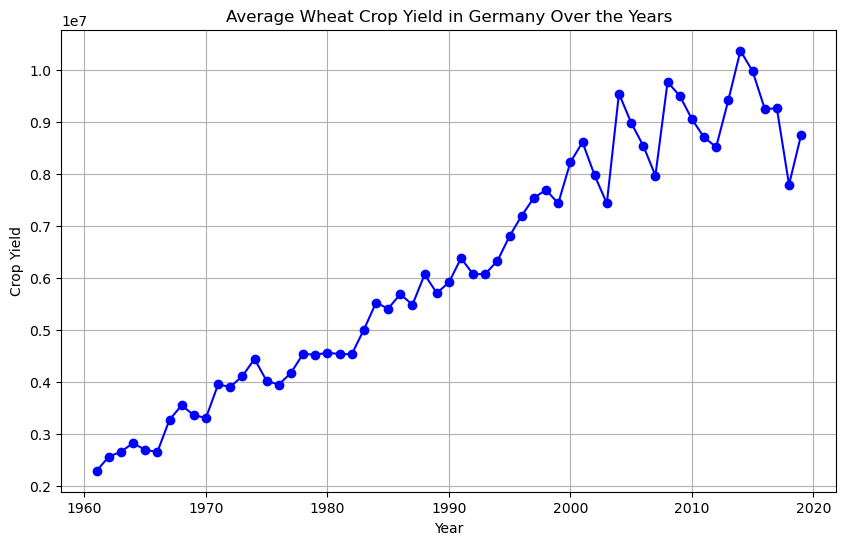

In [94]:
import matplotlib.pyplot as plt

# Specify the target crop and country
target_crop = 'Wheat'
target_country = 'Germany'  # Replace with the actual country name

# Filter data for the specific crop and country
filtered_data = crops_all[(crops_all['Item'] == target_crop) & (crops_all['Area'] == target_country)]

# Group by 'year' and calculate the mean crop yield for each year
mean_yield_by_year = filtered_data.groupby('Year')['Value'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(mean_yield_by_year['Year'], mean_yield_by_year['Value'], marker='o', linestyle='-', color='b')
plt.title(f'Average {target_crop.capitalize()} Crop Yield in {target_country} Over the Years')
plt.xlabel('Year')
plt.ylabel('Crop Yield')
plt.grid(True)
plt.show()


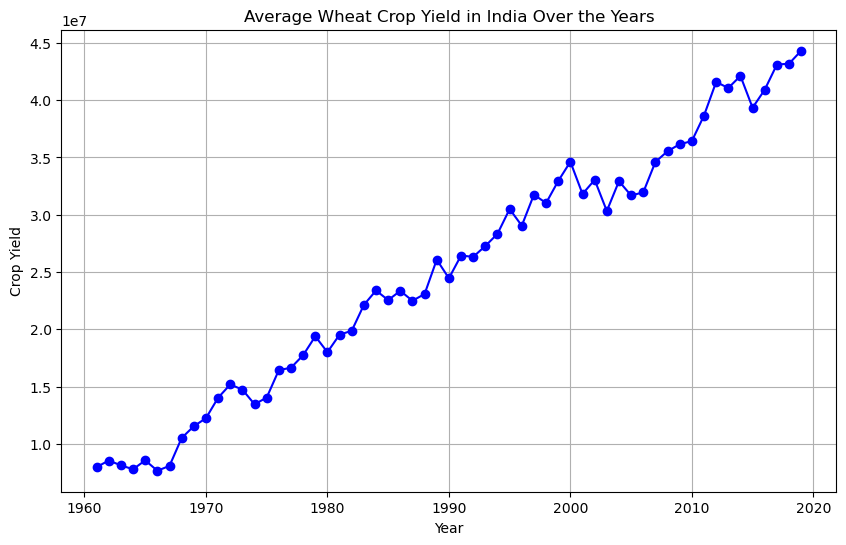

In [95]:
# Specify the target crop and country
target_crop = 'Wheat'
target_country = 'India'  # Replace with the actual country name

# Filter data for the specific crop and country
filtered_data = crops_all[(crops_all['Item'] == target_crop) & (crops_all['Area'] == target_country)]

# Group by 'year' and calculate the mean crop yield for each year
mean_yield_by_year = filtered_data.groupby('Year')['Value'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(mean_yield_by_year['Year'], mean_yield_by_year['Value'], marker='o', linestyle='-', color='b')
plt.title(f'Average {target_crop.capitalize()} Crop Yield in {target_country} Over the Years')
plt.xlabel('Year')
plt.ylabel('Crop Yield')
plt.grid(True)
plt.show()


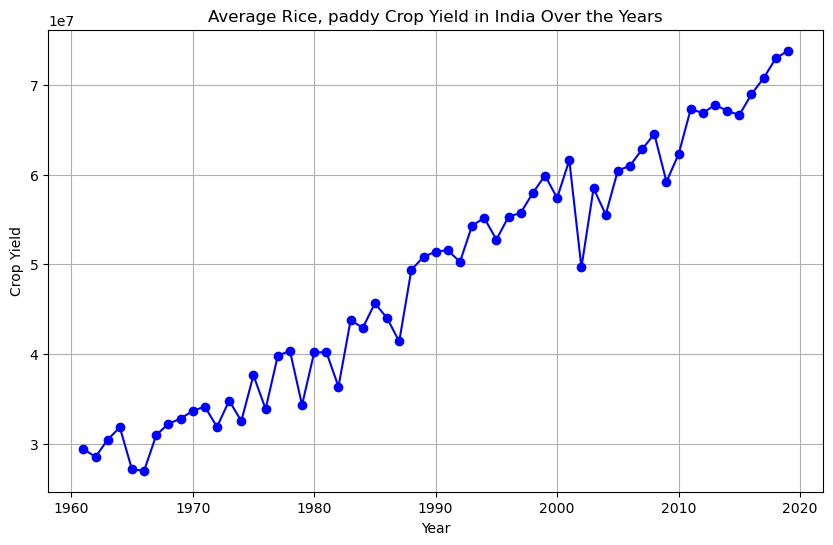

In [96]:
# Specify the target crop and country
target_crop = 'Rice, paddy'
target_country = 'India'  

# Filter data for the specific crop and country
filtered_data = crops_all[(crops_all['Item'] == target_crop) & (crops_all['Area'] == target_country)]

# Group by 'year' and calculate the mean crop yield for each year
mean_yield_by_year = filtered_data.groupby('Year')['Value'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(mean_yield_by_year['Year'], mean_yield_by_year['Value'], marker='o', linestyle='-', color='b')
plt.title(f'Average {target_crop.capitalize()} Crop Yield in {target_country} Over the Years')
plt.xlabel('Year')
plt.ylabel('Crop Yield')
plt.grid(True)
plt.show()


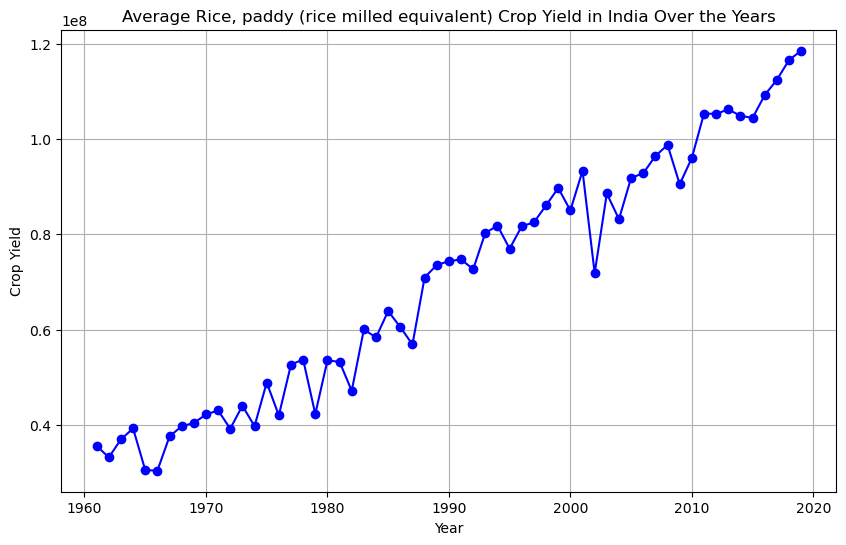

In [97]:
# Specify the target crop and country
target_crop = 'Rice, paddy (rice milled equivalent)'
target_country = 'India'  

# Filter data for the specific crop and country
filtered_data = crops_all[(crops_all['Item'] == target_crop) & (crops_all['Area'] == target_country)]

# Group by 'year' and calculate the mean crop yield for each year
mean_yield_by_year = filtered_data.groupby('Year')['Value'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(mean_yield_by_year['Year'], mean_yield_by_year['Value'], marker='o', linestyle='-', color='b')
plt.title(f'Average {target_crop.capitalize()} Crop Yield in {target_country} Over the Years')
plt.xlabel('Year')
plt.ylabel('Crop Yield')
plt.grid(True)
plt.show()

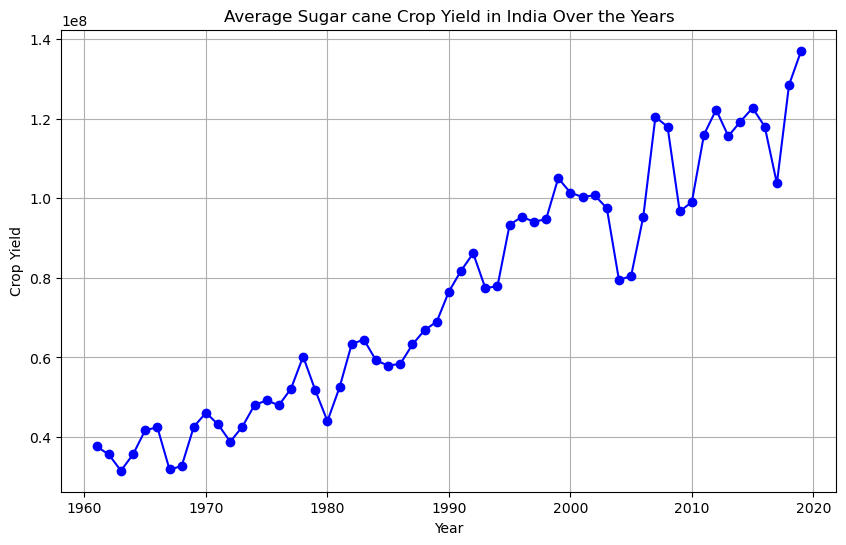

In [98]:
# Specify the target crop and country
target_crop = 'Sugar cane'
target_country = 'India'  # Replace with the actual country name

# Filter data for the specific crop and country
filtered_data = crops_all[(crops_all['Item'] == target_crop) & (crops_all['Area'] == target_country)]

# Group by 'year' and calculate the mean crop yield for each year
mean_yield_by_year = filtered_data.groupby('Year')['Value'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(mean_yield_by_year['Year'], mean_yield_by_year['Value'], marker='o', linestyle='-', color='b')
plt.title(f'Average {target_crop.capitalize()} Crop Yield in {target_country} Over the Years')
plt.xlabel('Year')
plt.ylabel('Crop Yield')
plt.grid(True)
plt.show()


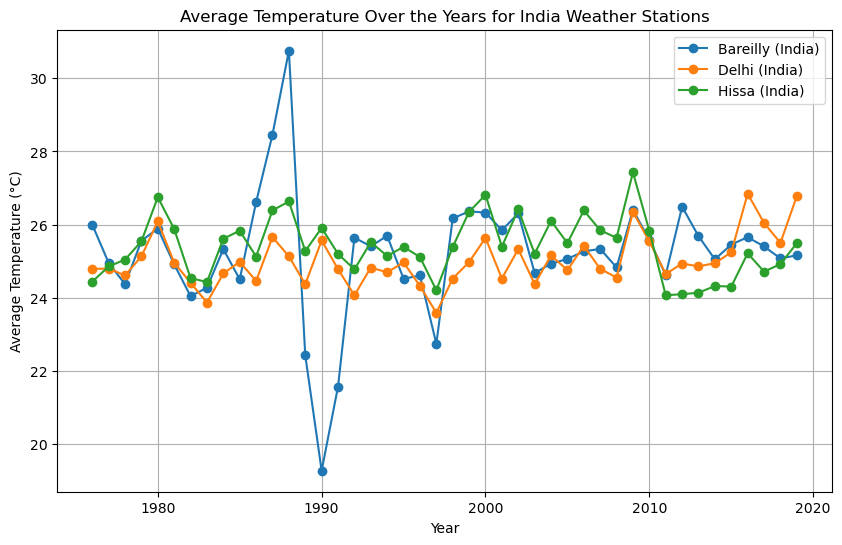

In [99]:

station_country_mapping = {
    '42189': {'station_name': 'Bareilly', 'country': 'India'},
    '42182': {'station_name': 'Delhi', 'country': 'India'},
    '42131': {'station_name': 'Hissa', 'country': 'India'}
}

# Extract the year from the 'weather_date' column
merged_weather['year'] = pd.to_datetime(merged_weather['weather_date']).dt.year

# Group by year and station, calculate the average temperature for each group
average_temp_by_station = merged_weather.groupby(['year', 'station'])['weather_tavg'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))

for station, info in station_country_mapping.items():
    station_data = average_temp_by_station[average_temp_by_station['station'] == station]
    plt.plot(station_data['year'], station_data['weather_tavg'], label=f'{info["station_name"]} ({info["country"]})', marker='o')

plt.title('Average Temperature Over the Years for India Weather Stations')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


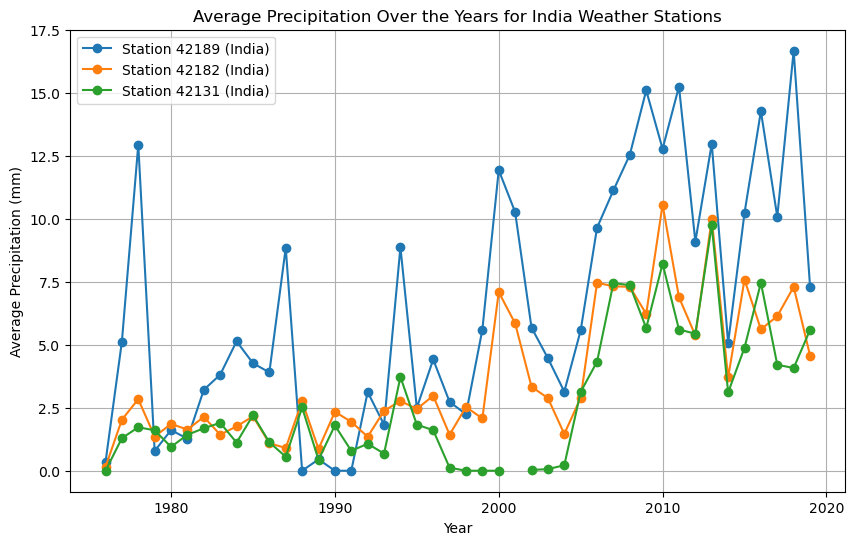

In [100]:

station_country_mapping = {
    '42189': 'India',
    '42182': 'India',
    '42131': 'India'
}

# Extract the year from the 'weather_date' column
merged_weather['year'] = pd.to_datetime(merged_weather['weather_date']).dt.year

# Group by year and station, calculate the average precipitation for each group
average_precipitation_by_station = merged_weather.groupby(['year', 'station'])['weather_prcp'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))

for station, country in station_country_mapping.items():
    station_data = average_precipitation_by_station[average_precipitation_by_station['station'] == station]
    plt.plot(station_data['year'], station_data['weather_prcp'], label=f'Station {station} ({country})', marker='o')

plt.title('Average Precipitation Over the Years for India Weather Stations')
plt.xlabel('Year')
plt.ylabel('Average Precipitation (mm)')
plt.legend()
plt.grid(True)
plt.show()


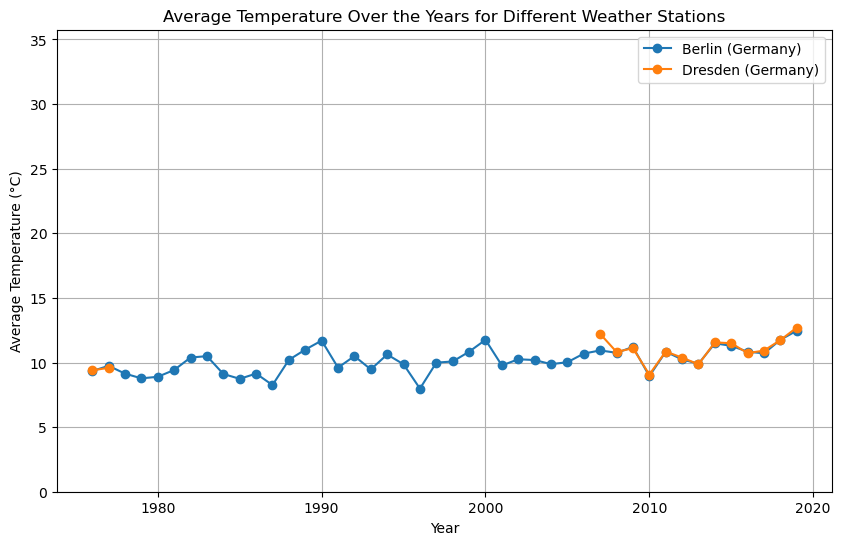

In [101]:
station_country_mapping = {
    '10384': {'station_name': 'Berlin', 'country': 'Germany'},
    'D1051': {'station_name': 'Dresden', 'country': 'Germany'},
}

# Extract the year from the 'weather_date' column
merged_weather['year'] = pd.to_datetime(merged_weather['weather_date']).dt.year

# Group by year and station, calculate the average temperature for each group
average_temp_by_station = merged_weather.groupby(['year', 'station'])['weather_tavg'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))

for station, info in station_country_mapping.items():
    station_data = average_temp_by_station[average_temp_by_station['station'] == station]
    plt.plot(station_data['year'], station_data['weather_tavg'], label=f'{info["station_name"]} ({info["country"]})', marker='o')

plt.title('Average Temperature Over the Years for Different Weather Stations')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)

# Set the y-axis limits based on data distribution
plt.ylim(0, average_temp_by_station['weather_tavg'].max() + 5)

plt.show()


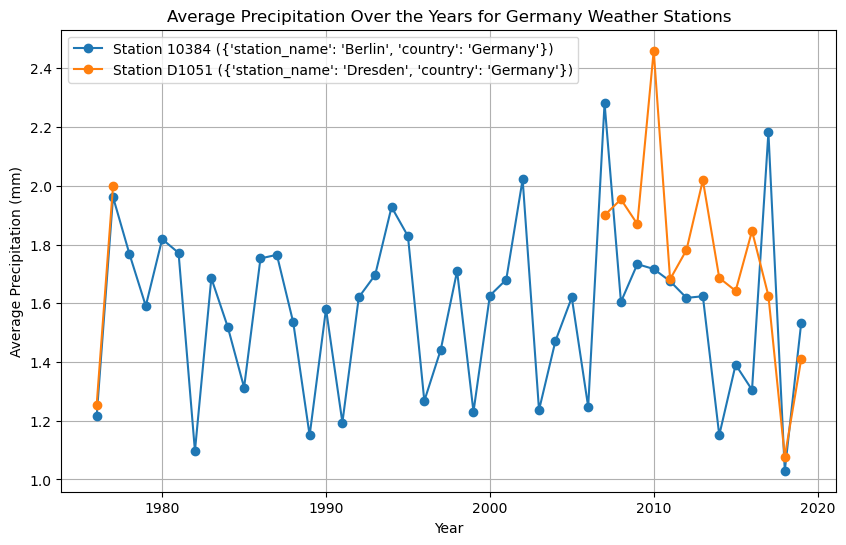

In [103]:
station_country_mapping = {
    '10384': {'station_name': 'Berlin', 'country': 'Germany'},
    'D1051': {'station_name': 'Dresden', 'country': 'Germany'},
}

# Extract the year from the 'weather_date' column
merged_weather['year'] = pd.to_datetime(merged_weather['weather_date']).dt.year

# Group by year and station, calculate the average precipitation for each group
average_precipitation_by_station = merged_weather.groupby(['year', 'station'])['weather_prcp'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))

for station, country in station_country_mapping.items():
    station_data = average_precipitation_by_station[average_precipitation_by_station['station'] == station]
    plt.plot(station_data['year'], station_data['weather_prcp'], label=f'Station {station} ({country})', marker='o')

plt.title('Average Precipitation Over the Years for Germany Weather Stations')
plt.xlabel('Year')
plt.ylabel('Average Precipitation (mm)')
plt.legend()
plt.grid(True)
plt.show()


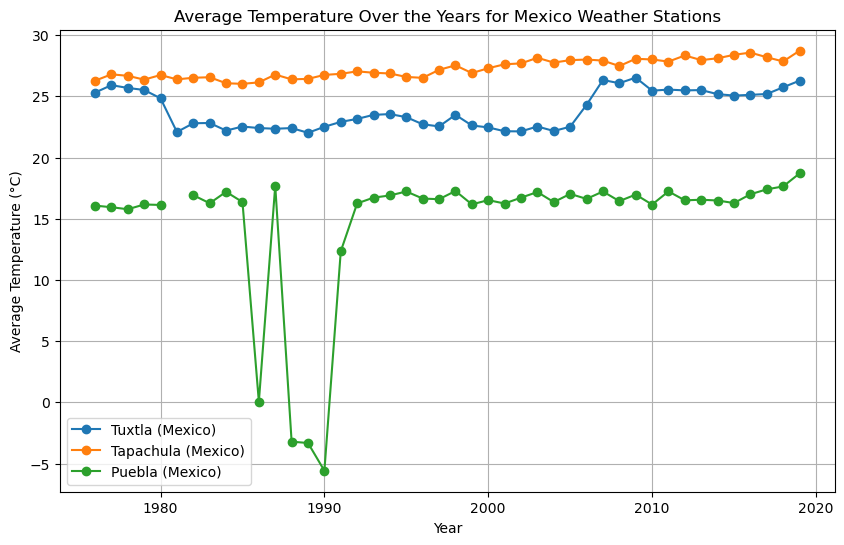

In [ ]:

station_country_mapping = {
    '76843': {'station_name': 'Tuxtla', 'country': 'Mexico'},
    '76903': {'station_name': 'Tapachula', 'country': 'Mexico'},
    '76685': {'station_name': 'Puebla', 'country': 'Mexico'}
}

# Extract the year from the 'weather_date' column
merged_weather['year'] = pd.to_datetime(merged_weather['weather_date']).dt.year

# Group by year and station, calculate the average temperature for each group
average_temp_by_station = merged_weather.groupby(['year', 'station'])['weather_tavg'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))

for station, info in station_country_mapping.items():
    station_data = average_temp_by_station[average_temp_by_station['station'] == station]
    plt.plot(station_data['year'], station_data['weather_tavg'], label=f'{info["station_name"]} ({info["country"]})', marker='o')

plt.title('Average Temperature Over the Years for Mexico Weather Stations')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

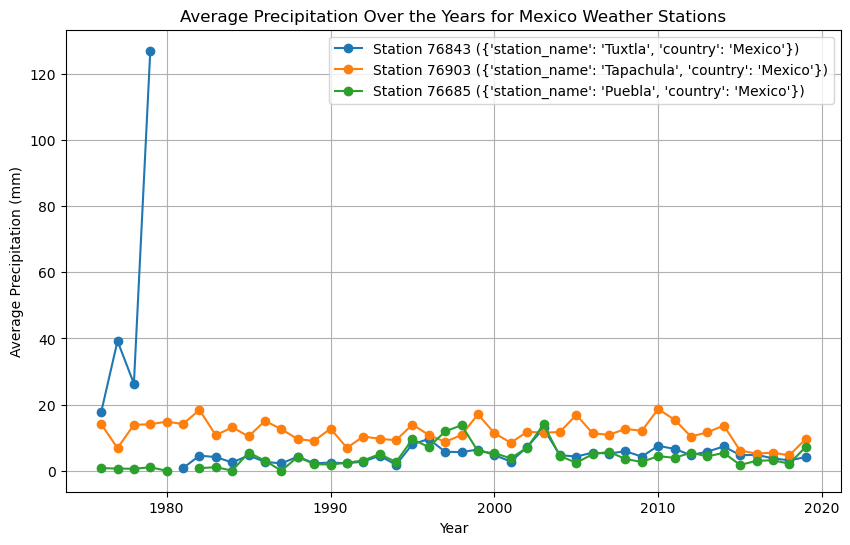

In [ ]:
station_country_mapping = {
    '76843': {'station_name': 'Tuxtla', 'country': 'Mexico'},
    '76903': {'station_name': 'Tapachula', 'country': 'Mexico'},
    '76685': {'station_name': 'Puebla', 'country': 'Mexico'}
}

# Extract the year from the 'weather_date' column
merged_weather['year'] = pd.to_datetime(merged_weather['weather_date']).dt.year

# Group by year and station, calculate the average precipitation for each group
average_precipitation_by_station = merged_weather.groupby(['year', 'station'])['weather_prcp'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))

for station, country in station_country_mapping.items():
    station_data = average_precipitation_by_station[average_precipitation_by_station['station'] == station]
    plt.plot(station_data['year'], station_data['weather_prcp'], label=f'Station {station} ({country})', marker='o')

plt.title('Average Precipitation Over the Years for Mexico Weather Stations')
plt.xlabel('Year')
plt.ylabel('Average Precipitation (mm)')
plt.legend()
plt.grid(True)
plt.show()


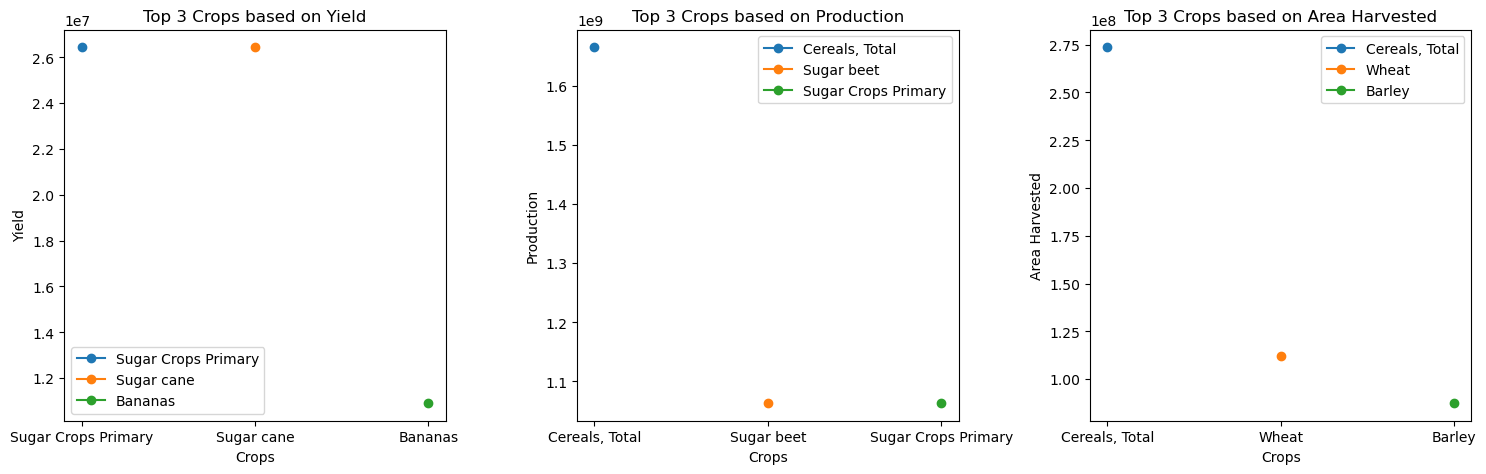

In [143]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Line plot for Yield (Top 3 crops)
top_3_crops_yield = top_10_crops_yield.head(3)
for i in range(len(top_3_crops_yield)):
    axs[0].plot(top_3_crops_yield['Item'].iloc[i], top_3_crops_yield['Value'].iloc[i], marker='o', label=top_3_crops_yield['Item'].iloc[i])

axs[0].set_title('Top 3 Crops based on Yield')
axs[0].set_xlabel('Crops')
axs[0].set_ylabel('Yield')
axs[0].legend()

# Line plot for Production (Top 3 crops)
top_3_crops_pro = top_10_crops_pro.head(3)
for i in range(len(top_3_crops_pro)):
    axs[1].plot(top_3_crops_pro['Item'].iloc[i], top_3_crops_pro['Value'].iloc[i], marker='o', label=top_3_crops_pro['Item'].iloc[i])

axs[1].set_title('Top 3 Crops based on Production')
axs[1].set_xlabel('Crops')
axs[1].set_ylabel('Production')
axs[1].legend()

# Line plot for Area Harvested (Top 3 crops)
top_3_crops_ah = top_10_crops_ah.head(3)
for i in range(len(top_3_crops_ah)):
    axs[2].plot(top_3_crops_ah['Item'].iloc[i], top_3_crops_ah['Value'].iloc[i], marker='o', label=top_3_crops_ah['Item'].iloc[i])

axs[2].set_title('Top 3 Crops based on Area Harvested')
axs[2].set_xlabel('Crops')
axs[2].set_ylabel('Area Harvested')
axs[2].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


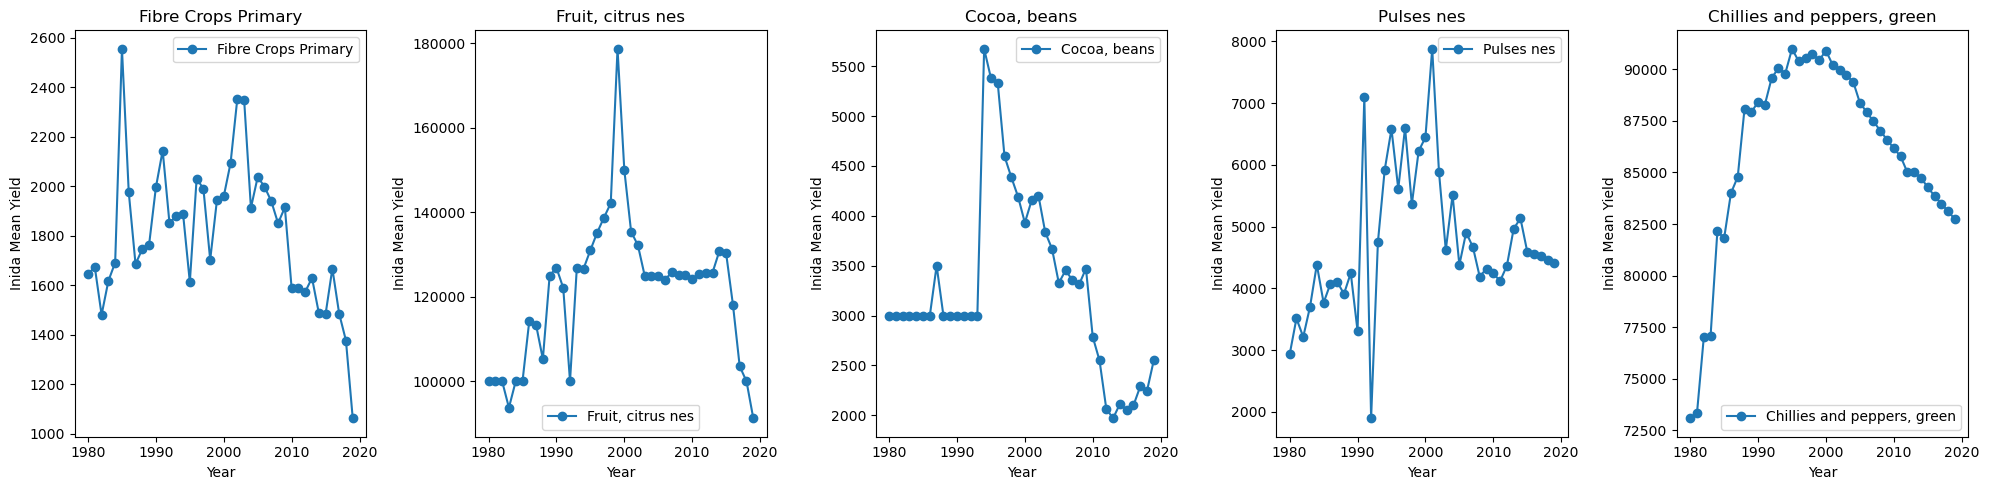

In [149]:

top_5_significant_decrease_crops = top_10_significant_decrease_crops.head(5)

# Set up subplots
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

# Function to plot line graph
def plot_line_graph(ax, data, title):
    ax.plot(data['Year'], data['Value'], marker='o', label=title)
    ax.set_title(title)
    ax.set_xlabel('Year')
    ax.set_ylabel('Inida Mean Yield')
    ax.legend()

# Plot line graph for each crop
for i, ax in enumerate(axs):
    if i < len(top_5_significant_decrease_crops):
        row = top_5_significant_decrease_crops.iloc[i]
        crop_data = india_crops_yield[india_crops_yield['Item'] == row['Item']]
        plot_line_graph(ax, crop_data, row['Item'])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

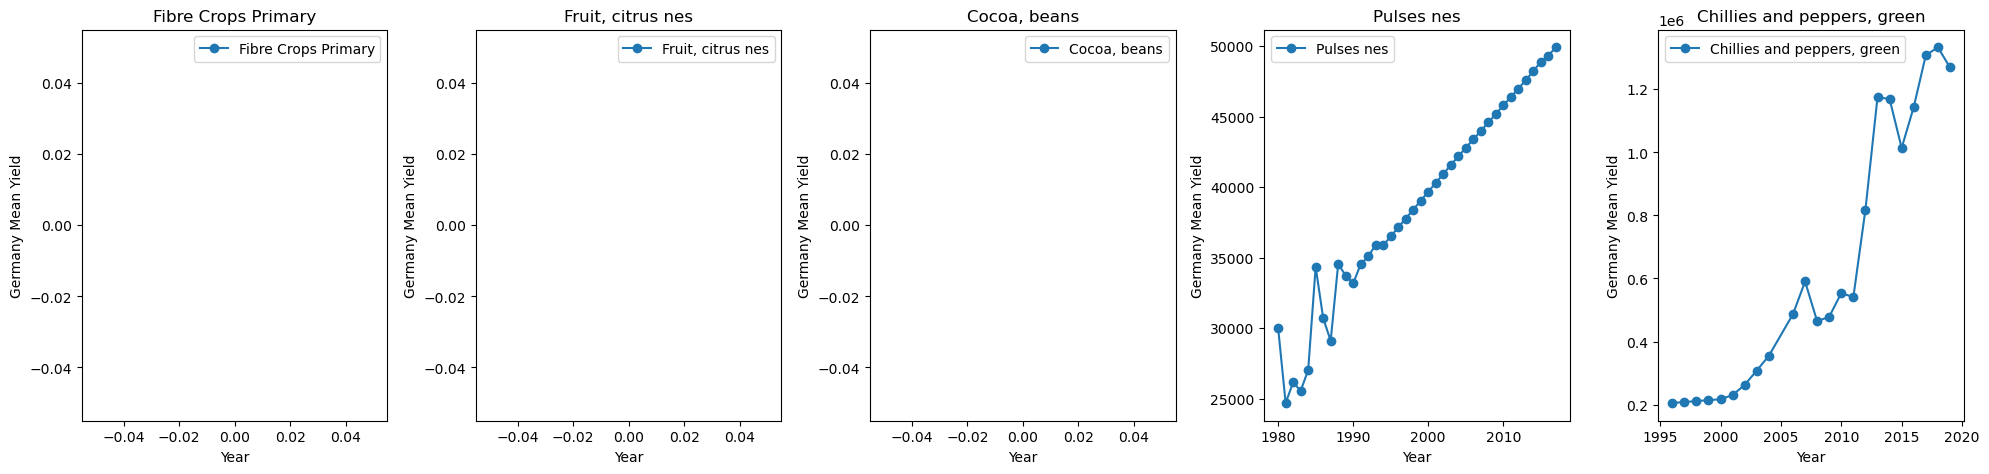

In [151]:

top_5_significant_decrease_crops = top_10_significant_decrease_crops.head(5)

# Set up subplots
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

# Function to plot line graph
def plot_line_graph(ax, data, title):
    ax.plot(data['Year'], data['Value'], marker='o', label=title)
    ax.set_title(title)
    ax.set_xlabel('Year')
    ax.set_ylabel('Germany Mean Yield')
    ax.legend()

# Plot line graph for each crop
for i, ax in enumerate(axs):
    if i < len(top_5_significant_decrease_crops):
        row = top_5_significant_decrease_crops.iloc[i]
        crop_data = germany_crops_yield[germany_crops_yield['Item'] == row['Item']]
        plot_line_graph(ax, crop_data, row['Item'])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

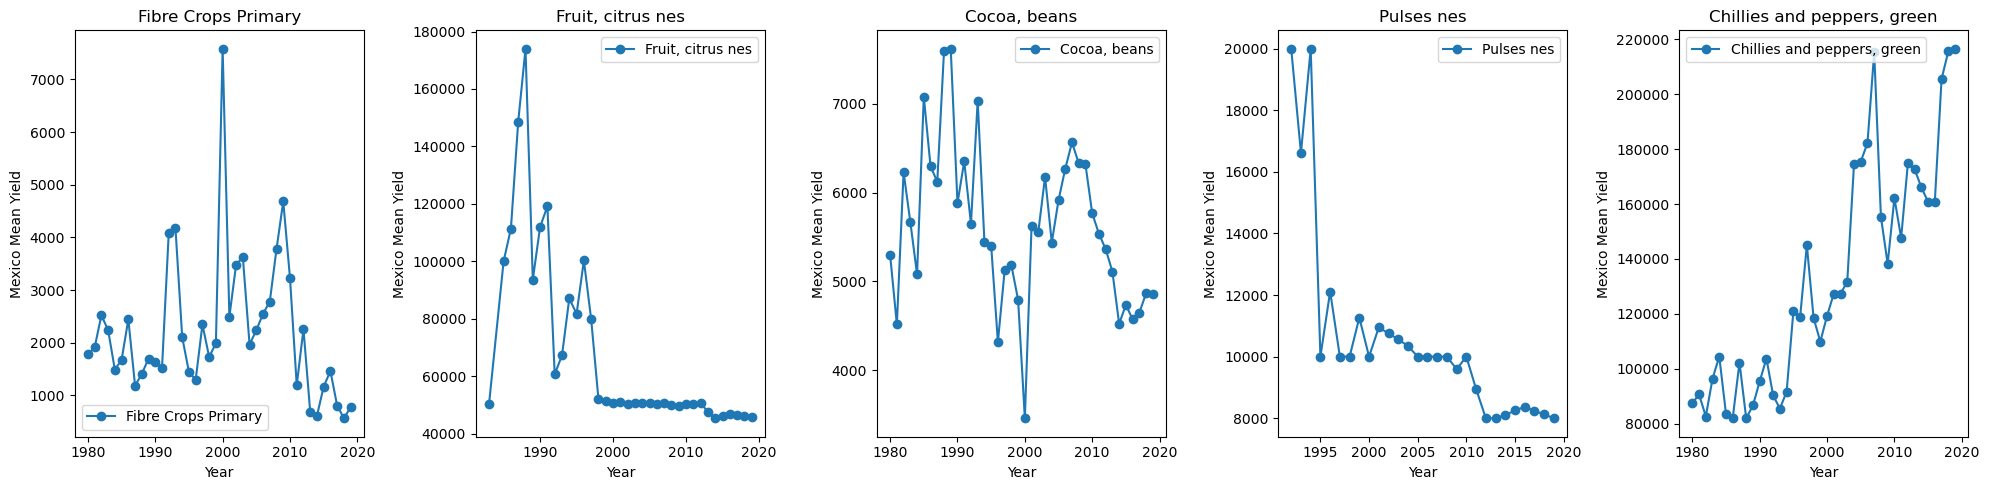

In [150]:

top_5_significant_decrease_crops = top_10_significant_decrease_crops.head(5)

# Set up subplots
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

# Function to plot line graph
def plot_line_graph(ax, data, title):
    ax.plot(data['Year'], data['Value'], marker='o', label=title)
    ax.set_title(title)
    ax.set_xlabel('Year')
    ax.set_ylabel('Mexico Mean Yield')
    ax.legend()

# Plot line graph for each crop
for i, ax in enumerate(axs):
    if i < len(top_5_significant_decrease_crops):
        row = top_5_significant_decrease_crops.iloc[i]
        crop_data = mexico_crops_yield[mexico_crops_yield['Item'] == row['Item']]
        plot_line_graph(ax, crop_data, row['Item'])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


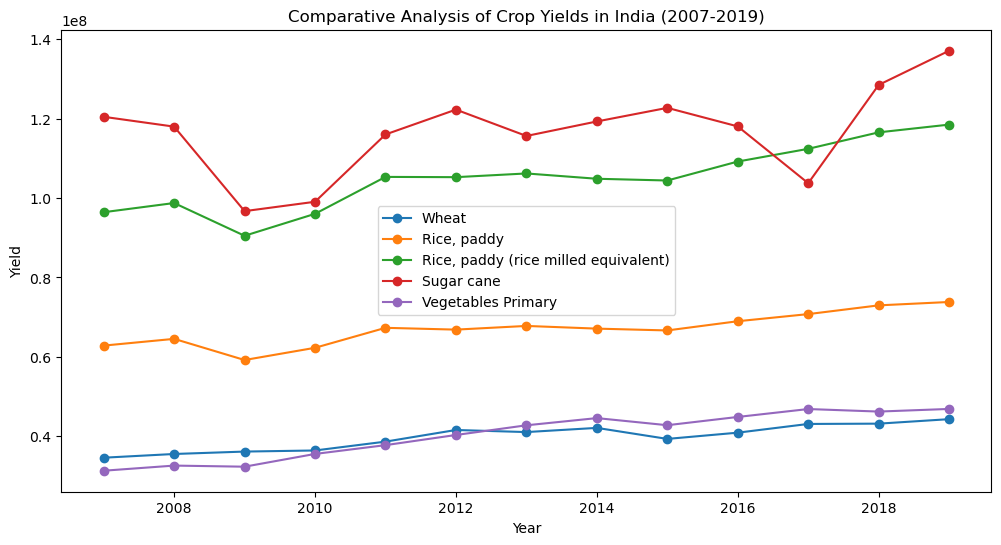

In [155]:


# Step 1: Filter data for India and the years 2007 to 2019
filtered_data = crops_all[(crops_all['Area'] == 'India') & (crops_all['Year'] >= 2007) & (crops_all['Year'] <= 2019)]

# Step 2: Select 5 specific crops for analysis
selected_crops = ['Wheat', 'Rice, paddy', 'Rice, paddy (rice milled equivalent)', 'Sugar cane', 'Vegetables Primary']
filtered_data = filtered_data[filtered_data['Item'].isin(selected_crops)]

# Step 3: Group by 'Year' and 'Crop' and calculate the mean yield
grouped_data = filtered_data.groupby(['Year', 'Item'])['Value'].mean().reset_index()

# Step 4: Pivot the data to have 'Year' as columns and 'Yield' as values
pivoted_data = grouped_data.pivot_table(index='Year', columns='Item', values='Value').reset_index()

# Step 5: Visualize the changes for the selected crops
plt.figure(figsize=(12, 6))

for crop in selected_crops:
    plt.plot(pivoted_data['Year'], pivoted_data[crop], label=crop, marker='o')

plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Comparative Analysis of Crop Yields in India (2007-2019)')
plt.legend()
plt.show()


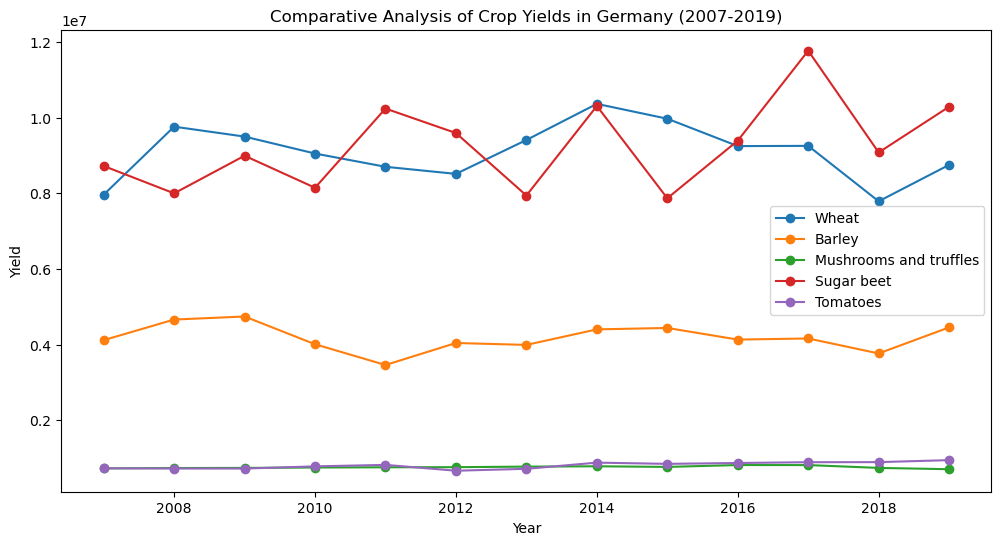

In [156]:
# Step 1: Filter data for India and the years 2007 to 2019
filtered_data = crops_all[(crops_all['Area'] == 'Germany') & (crops_all['Year'] >= 2007) & (crops_all['Year'] <= 2019)]

# Step 2: Select 5 specific crops for analysis
selected_crops = ['Wheat', 'Barley', 'Mushrooms and truffles', 'Sugar beet', 'Tomatoes']
filtered_data = filtered_data[filtered_data['Item'].isin(selected_crops)]

# Step 3: Group by 'Year' and 'Crop' and calculate the mean yield
grouped_data = filtered_data.groupby(['Year', 'Item'])['Value'].mean().reset_index()

# Step 4: Pivot the data to have 'Year' as columns and 'Yield' as values
pivoted_data = grouped_data.pivot_table(index='Year', columns='Item', values='Value').reset_index()

# Step 5: Visualize the changes for the selected crops
plt.figure(figsize=(12, 6))

for crop in selected_crops:
    plt.plot(pivoted_data['Year'], pivoted_data[crop], label=crop, marker='o')

plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Comparative Analysis of Crop Yields in Germany (2007-2019)')
plt.legend()
plt.show()

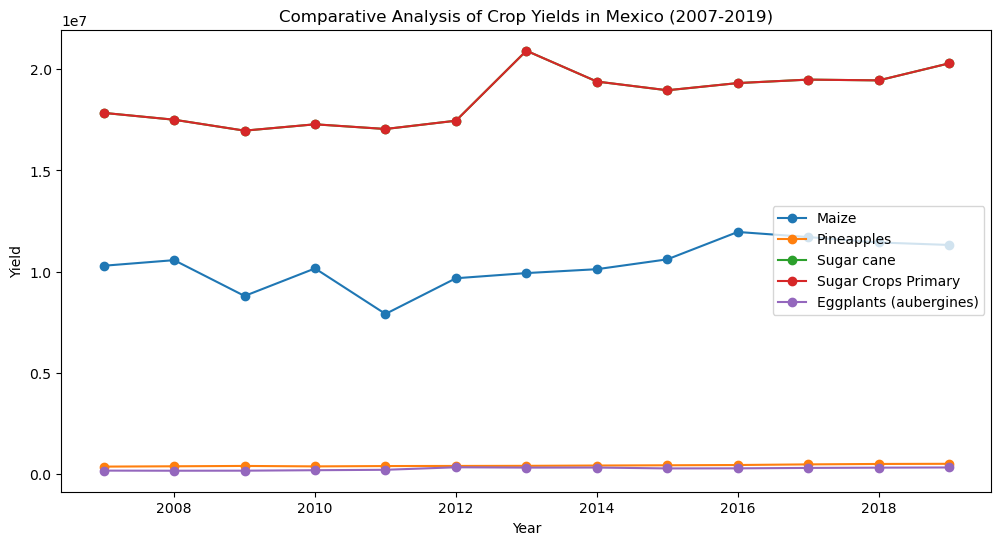

In [158]:
# Step 1: Filter data for India and the years 2007 to 2019
filtered_data = crops_all[(crops_all['Area'] == 'Mexico') & (crops_all['Year'] >= 2007) & (crops_all['Year'] <= 2019)]

# Step 2: Select 5 specific crops for analysis
selected_crops = ['Maize', 'Pineapples', 'Sugar cane', 'Sugar Crops Primary', 'Eggplants (aubergines)']
filtered_data = filtered_data[filtered_data['Item'].isin(selected_crops)]

# Step 3: Group by 'Year' and 'Crop' and calculate the mean yield
grouped_data = filtered_data.groupby(['Year', 'Item'])['Value'].mean().reset_index()

# Step 4: Pivot the data to have 'Year' as columns and 'Yield' as values
pivoted_data = grouped_data.pivot_table(index='Year', columns='Item', values='Value').reset_index()

# Step 5: Visualize the changes for the selected crops
plt.figure(figsize=(12, 6))

for crop in selected_crops:
    plt.plot(pivoted_data['Year'], pivoted_data[crop], label=crop, marker='o')

plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Comparative Analysis of Crop Yields in Mexico (2007-2019)')
plt.legend()
plt.show()